In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import glob
import os
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from scipy import stats

import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn import metrics
import pandas as pd
from scipy import signal
from scipy import stats
import os
from sklearn.model_selection import cross_val_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# for svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import entropy
from numpy import cov
from scipy.signal import find_peaks
import seaborn as sns
import warnings
import math
import scipy as sp
import scipy.fftpack
import json
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
from scipy.signal import savgol_filter
import os
import tkinter as tk
from tkinter import messagebox
import pickle

# import easygui


In [2]:
import os
import pandas as pd

# Danh sách các thư mục chứa dữ liệu
root_dirs = [r"C:\Users\quang\Documents\Zalo Received Files\Processed_20hz (1)"]

# Hàm kiểm tra và xử lý từng tệp dữ liệu
def check_file(file_path):
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()

        # Tìm chỉ mục của dòng '@DATA'
        data_start_index = None
        for i in range(len(lines)):
            if lines[i].strip() == "@DATA":
                data_start_index = i + 1  # Lấy dòng ngay sau @DATA
        
        # Nếu không tìm thấy '@DATA', đọc toàn bộ file
        if data_start_index is None:
            print(f"⚠ Không tìm thấy '@DATA' trong {file_path}, đọc toàn bộ file.")
            data_start_index = 0
        else:
            print(f"📄 Đọc dữ liệu từ {file_path} sau @DATA.")

        # Lấy dữ liệu sau @DATA (hoặc toàn bộ file nếu không có @DATA)
        data_lines = lines[data_start_index:]

        # Chuyển dữ liệu thành DataFrame
        data = pd.DataFrame([line.strip().split(',') for line in data_lines], columns=["Timestamp", "ax", "ay", "az"])

        # Chuyển đổi cột ax, ay, az sang kiểu số
        for col in ['ax', 'ay', 'az']:
            data[col] = pd.to_numeric(data[col], errors='coerce')
            if data[col].isnull().any():
                raise ValueError(f"⚠ Cột {col} có giá trị NaN hoặc không hợp lệ trong {file_path}")

        print(f"✅ Hoàn thành xử lý: {file_path} ({len(data)} dòng hợp lệ)")

    except Exception as e:
        print(f"❌ Lỗi trong tệp {file_path}: {e}")

# Hàm kiểm tra tất cả các tệp trong nhiều thư mục
def check_all_files(root_dirs):
    for root_dir in root_dirs:
        if not os.path.exists(root_dir):
            print(f"🚫 Thư mục {root_dir} không tồn tại, bỏ qua!")
            continue

        for subdir, _, files in os.walk(root_dir):
            for filename in files:
                if "_acc_" in filename and filename.endswith(".txt"):
                    check_file(os.path.join(subdir, filename))

# Kiểm tra tất cả tệp trong nhiều thư mục
check_all_files(root_dirs)


In [3]:

# Danh sách thư mục cần quét
root_dirs = [r"C:\Users\quang\Documents\Zalo Received Files\Processed_20hz (1)"]
columns = ['timestamp', 'Acc_X', 'Acc_Y', 'Acc_Z']


# Tạo danh sách lưu dữ liệu
w_Lying = []
w_Sitting = []
w_Standing = []
w_Walking = []
w_Jogging = []
w_Falling = []
w_Stairing = []

for root_dir in root_dirs:
    # FALLING
     # FALLING
    activity_path = os.path.join(root_dir, '7FAL')
    if os.path.exists(activity_path):
        for person in os.listdir(activity_path):
            person_path = os.path.join(activity_path, person)
            for filename in os.listdir(person_path):
                file_path = os.path.join(person_path, filename)
                data = pd.read_csv(file_path, names=columns)
                data['Acc_Z'] = data['Acc_Z'].astype(str).str.replace(';', '').astype(float)
                data = data.dropna()
                w_Falling.append(data)  # Giữ lại dữ liệu từ cả 2 thư mục
    print(f"✅ w_Falling = {len(w_Falling)}")

# Định nghĩa cửa sổ trượt
window_size = 6 * 20  # 6 giây
stride = 3 * 20  # 3 giây

    # LYING
w_Lying = []
for root_dir in root_dirs:  # Duyệt qua từng thư mục dữ liệu
    activity_path = os.path.join(root_dir, '2LYG')
    if os.path.exists(activity_path):
        for person in os.listdir(activity_path):
            person_path = os.path.join(activity_path, person)
            for filename in os.listdir(person_path):
                file_path = os.path.join(person_path, filename)
                data = pd.read_csv(file_path, names=columns)
                data['Acc_Z'] = data['Acc_Z'].astype(str).str.replace(';', '').astype(float)
                data = data.dropna()
                w_data = [data.iloc[i:i + window_size] for i in range(0, len(data), stride) if i + window_size <= len(data)]
                w_Lying.extend(w_data)  # Thêm dữ liệu mới vào danh sách cũ (không reset)
    print(f"✅ w_Lying (cộng dồn) = {len(w_Lying)}")
    # SITTING
    w_Sitting = []
    activity_path = os.path.join(root_dir, '3SIT')
    if os.path.exists(activity_path):
        for person in os.listdir(activity_path):
            person_path = os.path.join(activity_path, person)
            for filename in os.listdir(person_path):
                file_path = os.path.join(person_path, filename)
                data = pd.read_csv(file_path, names=columns)
                data['Acc_Z'] = data['Acc_Z'].astype(str).str.replace(';', '').astype(float)
                data = data.dropna()
                w_data = [data.iloc[i:i + window_size] for i in range(0, len(data), stride) if i + window_size <= len(data)]
                w_Sitting.extend(w_data)  # Thêm dữ liệu mới vào danh sách cũ (không reset)
    print(f"✅ w_Sitting (cộng dồn) = {len(w_Sitting)}")

    # STANDING
    w_Standing = []
    activity_path = os.path.join(root_dir, '1STD')
    if os.path.exists(activity_path):
        for person in os.listdir(activity_path):
            person_path = os.path.join(activity_path, person)
            for filename in os.listdir(person_path):
                file_path = os.path.join(person_path, filename)
                data = pd.read_csv(file_path, names=columns)
                data['Acc_Z'] = data['Acc_Z'].astype(str).str.replace(';', '').astype(float)
                data = data.dropna()
                w_data = [data[i:i + window_size] for i in range(0, len(data), stride) if i + window_size <= len(data)]
                w_Standing.extend(w_data)  # Thêm dữ liệu mới vào danh sách cũ (không reset)
    print(f"✅ w_Standing (cộng dồn) = {len(w_Standing)}")

    # WALKING
    w_Walking = []
    activity_path = os.path.join(root_dir, '4WAL')
    if os.path.exists(activity_path):
        for person in os.listdir(activity_path):
            person_path = os.path.join(activity_path, person)
            for filename in os.listdir(person_path):
                file_path = os.path.join(person_path, filename)
                data = pd.read_csv(file_path, names=columns)
                data['Acc_Z'] = data['Acc_Z'].astype(str).str.replace(';', '').astype(float)
                data = data.dropna()
                w_data = [data[i:i + window_size] for i in range(0, len(data), stride) if i + window_size <= len(data)]
                w_Walking.extend(w_data)  # Thêm dữ liệu mới vào danh sách cũ (không reset)
    print(f"✅ w_Walking (cộng dồn) = {len(w_Walking)}")

    # JOGGING
    w_Jogging = []  # Khởi tạo danh sách
activity_path = os.path.join(root_dir, '5JOG')

if os.path.exists(activity_path):
    for person in os.listdir(activity_path):
        person_path = os.path.join(activity_path, person)

        if not os.path.isdir(person_path):  # Bỏ qua nếu không phải thư mục
            print(f"⚠ Bỏ qua file: {person_path}")
            continue

        for filename in os.listdir(person_path):
            file_path = os.path.join(person_path, filename)

            try:
                # Đọc file, đọc dưới dạng chuỗi để loại bỏ dữ liệu không hợp lệ
                data = pd.read_csv(file_path, names=columns, dtype=str)

                # Loại bỏ các dòng chứa chữ cái trong cột Acc_Z
                data = data[~data['Acc_Z'].str.contains('[a-zA-Z]', regex=True, na=False)]

                # Chuyển đổi cột Acc_Z về kiểu float, loại bỏ dấu ';'
                data['Acc_Z'] = data['Acc_Z'].str.replace(';', '', regex=True).astype(float)

                # Xóa dòng có giá trị NaN
                data = data.dropna()

                # Chia thành cửa sổ dữ liệu (windowing)
                w_data = [data.iloc[i:i + window_size] for i in range(0, len(data), stride) if i + window_size <= len(data)]
                
                # Nhân dữ liệu lên 3 lần
                w_Jogging.extend(w_data * 5)  

            except Exception as e:
                print(f"⚠ Lỗi khi xử lý file {file_path}: {e}")

print(f"✅ w_Jogging = {len(w_Jogging)}")


    # STAIRING
w_Stairing = []

for root_dir in root_dirs:
    print(f"📂 Đang xử lý thư mục: {root_dir}")

    activity_path = os.path.join(root_dir, '6STA')

    if not os.path.exists(activity_path):
        print(f"⚠ Không tìm thấy thư mục: {activity_path}")
        continue

    for person in os.listdir(activity_path):
        person_path = os.path.join(activity_path, person)

        if not os.path.isdir(person_path):  # Kiểm tra xem có phải thư mục không
            print(f"⚠ Bỏ qua file không hợp lệ: {person_path}")
            continue

        for filename in os.listdir(person_path):
            file_path = os.path.join(person_path, filename)

            try:
                # Đọc file, đọc dưới dạng chuỗi để loại bỏ dữ liệu không hợp lệ
                data = pd.read_csv(file_path, names=columns, dtype=str)

                # Loại bỏ các dòng chứa chữ cái trong cột Acc_Z
                data = data[~data['Acc_Z'].str.contains('[a-zA-Z]', regex=True, na=False)]

                # Chuyển đổi cột Acc_Z về kiểu float, loại bỏ dấu ';'
                data['Acc_Z'] = data['Acc_Z'].str.replace(';', '', regex=True).astype(float)

                # Xóa dòng có giá trị NaN
                data = data.dropna()

                # Chia thành cửa sổ dữ liệu (windowing)
                w_data = [data.iloc[i:i + window_size] for i in range(0, len(data), stride) if i + window_size <= len(data)]
                w_Stairing.extend(w_data)  # Thêm dữ liệu mới vào danh sách cũ (không reset)

            except Exception as e:
                print(f"⚠ Lỗi khi xử lý file {file_path}: {e}")

print(f"✅ w_Stairing (cộng dồn) = {len(w_Stairing)}")



✅ w_Falling = 1320
✅ w_Lying (cộng dồn) = 1086
✅ w_Sitting (cộng dồn) = 1260
✅ w_Standing (cộng dồn) = 1351
✅ w_Walking (cộng dồn) = 991
✅ w_Jogging = 1050
📂 Đang xử lý thư mục: C:\Users\quang\Documents\Zalo Received Files\Processed_20hz (1)
✅ w_Stairing (cộng dồn) = 922


In [4]:
print("📊 Tổng số cửa sổ dữ liệu của mỗi hành động:")
print(f"✅ Lying: {len(w_Lying)}")
print(f"✅ Sitting: {len(w_Sitting)}")
print(f"✅ Standing: {len(w_Standing)}")
print(f"✅ Walking: {len(w_Walking)}")
print(f"✅ Jogging: {len(w_Jogging)}")
print(f"✅ Falling: {len(w_Falling)}")
print(f"✅ Stairing: {len(w_Stairing)}")

📊 Tổng số cửa sổ dữ liệu của mỗi hành động:
✅ Lying: 1086
✅ Sitting: 1260
✅ Standing: 1351
✅ Walking: 991
✅ Jogging: 1050
✅ Falling: 1320
✅ Stairing: 922


In [5]:
# Định nghĩa hằng số nhân lần
MULTIPLIER = 1

# Hàm để nhân lần dữ liệu
def multiply_data(data_list):
    multiplied_data = []
    for window in data_list:
        for _ in range(MULTIPLIER):
            multiplied_data.append(window)
    return multiplied_data

# Nhân dữ liệu của w_Lying lên MULTIPLIER lần và gán lại cho w_Lying
w_Lying = multiply_data(w_Lying)
print("✅ w_Lying =", len(w_Lying))

w_Sitting = multiply_data(w_Sitting)
print("✅ w_Sitting =", len(w_Sitting))

# Nhân dữ liệu của w_Standing lên MULTIPLIER lần và gán lại cho w_Standing
w_Standing = multiply_data(w_Standing)
print("✅ w_Standing =", len(w_Standing))

# Nhân dữ liệu của w_Walking lên MULTIPLIER lần và gán lại cho w_Walking
w_Walking = multiply_data(w_Walking)
print("✅ w_Walking =", len(w_Walking))

# Nhân dữ liệu của w_Jogging lên MULTIPLIER lần và gán lại cho w_Jogging
w_Jogging = multiply_data(w_Jogging)
print("✅ w_Jogging =", len(w_Jogging))

w_Stairing = multiply_data(w_Stairing)
print("✅ w_Stairing =", len(w_Stairing))

w_Falling = multiply_data(w_Falling)
print("✅ w_Falling =", len(w_Falling))


✅ w_Lying = 1086
✅ w_Sitting = 1260
✅ w_Standing = 1351
✅ w_Walking = 991
✅ w_Jogging = 1050
✅ w_Stairing = 922
✅ w_Falling = 1320


In [6]:
import os

folder_paths = [r"C:\Users\quang\Documents\Zalo Received Files\Processed_20hz (1)"]  # Danh sách thư mục
RateTrain = 0.6  # Tỷ lệ tập huấn luyện
random_state = 42  # Trạng thái ngẫu nhiên để tái tạo kết quả
# Hàm đọc dữ liệu gia tốc từ tệp
def read_acceleration_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    acceleration_data = []
    for line in lines:
        line = line.strip().rstrip(";")  # Loại bỏ khoảng trắng và dấu ";"
        data = line.split(",")  # Tách dữ liệu bằng dấu phẩy

        if len(data) == 4:  # Kiểm tra đúng định dạng (giả sử 4 cột: Timestamp, AccX, AccY, AccZ)
            acceleration_data.append(data)

    return acceleration_data if acceleration_data else None

# Duyệt qua các thư mục
for folder_path in folder_paths:
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)

            if os.path.getsize(file_path) > 0:  # Kiểm tra nếu tệp không rỗng
                acceleration_data = read_acceleration_data(file_path)
                if acceleration_data is not None:
                    print(f"Xử lý tệp: {file_name} - Số dòng hợp lệ: {len(acceleration_data)}")
                    # Tiếp tục xử lý dữ liệu (chia train/test, lưu file, v.v.)
                else:
                    print(f"Tệp {file_name} không có dữ liệu hợp lệ.")
            else:
                print(f"Tệp {file_name} rỗng, bỏ qua.")


Xử lý tệp: 2.txt - Số dòng hợp lệ: 29790
Xử lý tệp: standing (3).txt - Số dòng hợp lệ: 22824
Xử lý tệp: 1.txt - Số dòng hợp lệ: 28698
Xử lý tệp: lying (7).txt - Số dòng hợp lệ: 34234
Xử lý tệp: lying (8).txt - Số dòng hợp lệ: 24084
Xử lý tệp: lying (4).txt - Số dòng hợp lệ: 1206
Xử lý tệp: lying (5).txt - Số dòng hợp lệ: 1198
Xử lý tệp: lying (6).txt - Số dòng hợp lệ: 1213
Xử lý tệp: lying (1).txt - Số dòng hợp lệ: 1336
Xử lý tệp: lying (2).txt - Số dòng hợp lệ: 1365
Xử lý tệp: lying (3).txt - Số dòng hợp lệ: 1209
Xử lý tệp: sitting (1).txt - Số dòng hợp lệ: 34246
Xử lý tệp: sitting (2).txt - Số dòng hợp lệ: 34515
Xử lý tệp: sitting (3).txt - Số dòng hợp lệ: 1198
Xử lý tệp: sitting (4).txt - Số dòng hợp lệ: 1241
Xử lý tệp: sitting (5).txt - Số dòng hợp lệ: 1218
Xử lý tệp: sitting (6).txt - Số dòng hợp lệ: 1296
Xử lý tệp: sitting (7).txt - Số dòng hợp lệ: 1283
Xử lý tệp: sitting (8).txt - Số dòng hợp lệ: 1341
Xử lý tệp: Walking (11).txt - Số dòng hợp lệ: 1377
Xử lý tệp: Walking (3).txt 

In [7]:
from sklearn.model_selection import train_test_split #hàm chia ngẫu nhiên tương ứng
RateTrain = 0.6
random_state = 42
test_Lying, train_Lying = train_test_split(w_Lying, test_size=RateTrain)
print('test_Lying:', len(test_Lying))
print('train_Lying:', len(train_Lying))

test_Sitting, train_Sitting = train_test_split(w_Sitting, test_size=RateTrain)
print('test_Sitting:', len(test_Sitting))
print('train_Sitting:', len(train_Sitting))

test_Standing, train_Standing = train_test_split(w_Standing, test_size=RateTrain)
print('test_Standing:', len(test_Standing))
print('train_Standing:', len(train_Standing))

test_Walking, train_Walking = train_test_split(w_Walking, test_size=RateTrain)
print('test_Walking:', len(test_Walking))
print('train_Walking:', len(train_Walking))

test_Jogging, train_Jogging = train_test_split(w_Jogging, test_size=RateTrain)
print('test_Jogging:', len(test_Jogging))
print('train_Jogging:', len(train_Jogging))

test_Stairing, train_Stairing = train_test_split(w_Stairing, test_size=RateTrain)
print('test_Stairing:', len(test_Stairing))
print('train_Stairing:', len(train_Stairing))

test_Falling, train_Falling = train_test_split(w_Falling, test_size=RateTrain)
print('test_Falling:', len(test_Falling))
print('train_Falling:', len(train_Falling))


test_Lying: 434
train_Lying: 652
test_Sitting: 504
train_Sitting: 756
test_Standing: 540
train_Standing: 811
test_Walking: 396
train_Walking: 595
test_Jogging: 420
train_Jogging: 630
test_Stairing: 368
train_Stairing: 554
test_Falling: 528
train_Falling: 792


<!-- XONG PHẦN XỬ LÝ DATASET - ĐÃ LƯU XONG CÁC CỬA SỔ -->

In [8]:
#tao chuoi du lieu va nhan dung de train
data_train= []
label_train = []
random_state = 42
for acts in train_Lying:
    data_train.append(pd.DataFrame(acts))
    label_train.append(0)

for acts in train_Sitting:
    data_train.append(pd.DataFrame(acts))
    label_train.append(1)

for acts in train_Standing:
    data_train.append(pd.DataFrame(acts))
    label_train.append(2)

for acts in train_Walking:
    data_train.append(pd.DataFrame(acts))
    label_train.append(3)

for acts in train_Jogging:
    data_train.append(pd.DataFrame(acts))
    label_train.append(4)
    
for acts in train_Stairing:
    data_train.append(pd.DataFrame(acts))
    label_train.append(5)

for acts in train_Falling:
    data_train.append(pd.DataFrame(acts))
    label_train.append(6)

#tao chuoi du lieu va nhan dung de test
data_test= []
label_test = []

for acts in test_Lying:
    data_test.append(pd.DataFrame(acts))
    label_test.append(0)

for acts in test_Sitting:
    data_test.append(pd.DataFrame(acts))
    label_test.append(1)

for acts in test_Standing:
    data_test.append(pd.DataFrame(acts))
    label_test.append(2)

for acts in test_Walking:
    data_test.append(pd.DataFrame(acts))
    label_test.append(3)

for acts in test_Jogging:
    data_test.append(pd.DataFrame(acts))
    label_test.append(4)
    
for acts in test_Stairing:
    data_test.append(pd.DataFrame(acts))
    label_test.append(5)
    
for acts in test_Falling:
    data_test.append(pd.DataFrame(acts))
    label_test.append(6)
    




print('data_train\'s length: ', len(data_train))
print('label_train\'s length: ', len(label_train))

print('data_test\'s length: ', len(data_test))
print('label_test\'s length: ', len(label_test))

import numpy as np
from scipy.stats import skew
from statsmodels.tsa.stattools import acf

def featuresFromBuffer(at):
  feat = np.zeros(18)
  ax = np.array(at['Acc_X'],dtype=np.float64)
  ay = np.array(at['Acc_Y'],dtype=np.float64)
  az = np.array(at['Acc_Z'],dtype=np.float64)
# Mean
  means = [np.mean(i) for i in [ax, ay, az]]
  feat[0:3] = means
# Standard deviation
  std = [np.std(i) for i in [ax, ay, az]]
  feat[3:6] = std
# Max
  max_ = [np.max(i) for i in [ax, ay, az]]
  feat[6:9] = max_
# Range
  Range = [np.amax(i)-np.amin(i) for i in [ax, ay, az]]
  feat[9:12] = Range
# hm
  hjorth_mobility = [np.sqrt(np.var(np.diff(i)) / np.var(i)) for i in [ax, ay, az]]
  feat[12:15] = hjorth_mobility
# autoc
  autocorr = []
  for i in [ax, ay, az]:
    acf_vals = acf(i, nlags=1, fft=True)
    autocorr.append(acf_vals[1] if len(acf_vals) > 1 else 0)
  feat[15:18] = autocorr

  # ssi = [np.sum(i**2) for i in [ax, ay, az]]
  # feat[18:21] = ssi 

  # sma = [np.sum(np.abs(i)) for i in [ax, ay, az]]
  # feat[18:21] = sma

# SKEW
  # skewness = [skew(i) for i in [ax, ay, az]]
  # feat[21:24] = skewness

#   RMS
  # rms = [np.sqrt(np.mean(i**2)) for i in [ax, ay, az]]
  # feat[12:15] = rms

# # MED
#   median_med = [np.median(np.abs(i - np.median(i))) for i in [ax, ay, az]]
#   feat[24:27] = median_med

# IQR
  # iqr = [np.percentile(i, 75) - np.percentile(i, 25) for i in [ax, ay, az]]
  # feat[15:18] = iqr
  
  # energy = [np.sqrt(np.mean(i**2)) for i in [ax, ay, az]]
  # feat[18:21] = energy
  return feat


data_train's length:  4790
label_train's length:  4790
data_test's length:  3190
label_test's length:  3190


In [9]:
def clean_data(data):
    """Làm sạch dữ liệu: loại bỏ các giá trị không hợp lệ"""
    for col in data.columns:
        # Xóa dấu ';' nếu có trong dữ liệu
        data[col] = data[col].astype(str).str.replace(';', '', regex=True)
        # Chuyển đổi về kiểu số (NaN nếu lỗi)
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Loại bỏ các dòng chứa giá trị NaN
    data = data.dropna()

    # Kiểm tra nếu dữ liệu bị rỗng sau khi làm sạch
    if data.empty:
        print("⚠️ Cảnh báo: Dữ liệu sau khi làm sạch bị rỗng!")
    
    return data

# Làm sạch tập dữ liệu train & test
data_train = [clean_data(action) for action in data_train if not action.empty]
data_test = [clean_data(action) for action in data_test if not action.empty]

print(f"✅ Số lượng mẫu train còn lại: {len(data_train)}")
print(f"✅ Số lượng mẫu test còn lại: {len(data_test)}")



# Trích xuất đặc trưng sau khi làm sạch
train_features = []
for action in data_train:
    if action.empty:
        print("⚠️ Bỏ qua action rỗng trong train!")
        continue
    feat = featuresFromBuffer(action)
    train_features.append(feat)

test_features = []
for action in data_test:
    if action.empty:
        print("⚠️ Bỏ qua action rỗng trong test!")
        continue
    feat = featuresFromBuffer(action)
    test_features.append(feat)

print(f"✅ Số lượng đặc trưng train: {len(train_features)}")
print(f"✅ Số lượng đặc trưng test: {len(test_features)}")


✅ Số lượng mẫu train còn lại: 4790
✅ Số lượng mẫu test còn lại: 3190
✅ Số lượng đặc trưng train: 4790
✅ Số lượng đặc trưng test: 3190


In [10]:
def Nofeature(at, fs):
  feat = np.zeros(3)
  ax = np.array(at['Acc_X'],dtype=np.float64)
  ay = np.array(at['Acc_Y'],dtype=np.float64)
  az = np.array(at['Acc_Z'],dtype=np.float64)
  feat[0:3]=[np.sum(i) for i in [ax,ay,az]]
  # feat[window_size:window_size*2]=y
  # feat[window_size*2:window_size*3]=z
  return feat
#----------------
no_features = []
for action in data_train:
  feat = Nofeature(action, 1)
  no_features.append(feat)

Gradient Boosting Decision Tree:
Accuracy of GBDT classifier on training set: 99.54
Accuracy of GBDT classifier on test set: 99.37


Decision Tree:
Accuracy of Decision Tree classifier on training set: 87.70
Accuracy of Decision Tree classifier on test set: 87.55


SVM:
Accuracy on training set: 99.02
Accuracy on test set: 99.28


Random Forests:
Accuracy of RF classifier on training set: 99.79
Accuracy of RF classifier on test set: 99.72


KNeighbor:
Accuracy of K-NN classifier on training set: 99.54
Accuracy of K-NN classifier on test set: 99.31


Text(0, 0.5, 'Độ chính xác (%)')

[Text(0, 0, 'GBDT'),
 Text(1, 0, 'Decision Tree'),
 Text(2, 0, 'SVM'),
 Text(3, 0, 'Random Forest'),
 Text(4, 0, 'K-NN')]

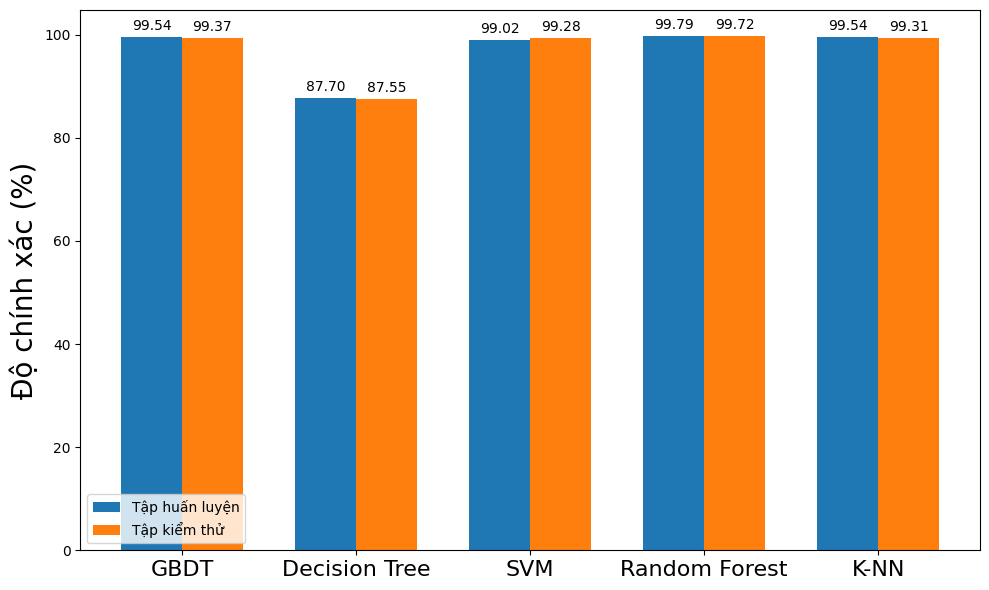

In [11]:
import time
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

print("Gradient Boosting Decision Tree:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=4,
    n_estimators=10,
    subsample=0.2,
    random_state=42
).fit(train_features, label_train)
predicted1 = clf1.predict(test_features)
confusion_test1 = confusion_matrix(label_test, predicted1)
print('Accuracy of GBDT classifier on training set: {:.2f}'.format(clf1.score(train_features, label_train)*100))
print('Accuracy of GBDT classifier on test set: {:.2f}'.format(clf1.score(test_features, label_test)*100))

print("\n\nDecision Tree:")
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(
    max_depth=4,
    random_state=42,
    min_samples_split=3
).fit(train_features, label_train)
predicted2 = clf2.predict(test_features)
confusion_test2 = confusion_matrix(label_test, predicted2)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf2.score(train_features, label_train)*100))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf2.score(test_features, label_test)*100))

print("\n\nSVM:")
clf3 = SVC(
    C=0.5,
    gamma='scale',
    random_state=42
).fit(train_features, label_train)
predicted3 = clf3.predict(test_features)
confusion_test3 = confusion_matrix(label_test, predicted3)
print("Accuracy on training set: {:.2f}".format(clf3.score(train_features, label_train)*100))
print("Accuracy on test set: {:.2f}".format(clf3.score(test_features, label_test)*100))

print('\n\nRandom Forests:')
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(
    n_estimators=20,
    max_depth=5,
    random_state=42
).fit(train_features, label_train)
predicted4 = clf4.predict(test_features)
confusion_test4 = confusion_matrix(label_test, predicted4)
print('Accuracy of RF classifier on training set: {:.2f}'.format(clf4.score(train_features, label_train)*100))
print('Accuracy of RF classifier on test set: {:.2f}'.format(clf4.score(test_features, label_test)*100))

print('\n\nKNeighbor:')
from sklearn.neighbors import KNeighborsClassifier
clf5 = KNeighborsClassifier(
    n_neighbors=7,
    weights='uniform'
).fit(train_features, label_train)
start_time1 = time.time()
predicted5 = clf5.predict(test_features)
confusion_test5 = confusion_matrix(label_test, predicted5)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(clf5.score(train_features, label_train)*100))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(clf5.score(test_features, label_test)*100))
start_time2 = time.time()

models = ['GBDT', 'Decision Tree', 'SVM', 'Random Forest', 'K-NN']
train_accuracies = [
    clf1.score(train_features, label_train)*100,
    clf2.score(train_features, label_train)*100,
    clf3.score(train_features, label_train)*100,
    clf4.score(train_features, label_train)*100,
    clf5.score(train_features, label_train)*100
]
test_accuracies = [
    clf1.score(test_features, label_test)*100,
    clf2.score(test_features, label_test)*100,
    clf3.score(test_features, label_test)*100,
    clf4.score(test_features, label_test)*100,
    clf5.score(test_features, label_test)*100
]

x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width / 2, train_accuracies, width, label='Tập huấn luyện')
rects2 = ax.bar(x + width / 2, test_accuracies, width, label='Tập kiểm thử')

ax.set_ylabel('Độ chính xác (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=16)
ax.legend()

def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.2f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center', va='bottom'
        )

add_values(rects1)
add_values(rects2)

plt.tight_layout()
plt.show()


In [12]:
# import numpy as np
# import pandas as pd
# import seaborn as sb
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Giả sử confusion_test4 đã được định nghĩa từ trước
# # Nếu chưa có, bạn có thể tạo thử một ma trận nhầm lẫn giả lập:
# # confusion_test4 = np.array([[50, 2, 1, 0, 0, 0, 0],
# #                             [5, 40, 5, 0, 0, 0, 0],
# #                             [1, 3, 45, 1, 0, 0, 0],
# #                             [0, 0, 2, 50, 2, 1, 0],
# #                             [0, 0, 0, 5, 45, 0, 0],
# #                             [0, 0, 0, 1, 2, 47, 0],
# #                             [0, 0, 0, 0, 0, 0, 50]])

# print('\n\n Random Forests stuffs: ')

# # Xác định số lớp từ confusion_test4
# num_classes = confusion_test4.shape[0]

# # Tạo DataFrame với chỉ mục và cột đúng kích thước
# df_cm4 = pd.DataFrame(confusion_test4, index=range(num_classes), columns=range(num_classes))

# print("Ma trận nhầm lẫn Random Forests: ")
# print(df_cm4)

# label_test = []
# y_pred = []

# for true_label in df_cm4.index:
#     for pred_label in df_cm4.columns:
#         count = df_cm4.loc[true_label, pred_label]
#         label_test.extend([true_label] * count)
#         y_pred.extend([pred_label] * count)

# label_test = np.array(label_test)
# y_pred = np.array(y_pred)

# # Danh sách nhãn tương ứng
# target_names = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Chạy bộ', 'Cầu Thang', 'Ngã']

# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # ✅ Chuyển ma trận thành phần trăm theo từng hàng
# conf_matrix = confusion_test4.astype(np.float64)
# row_sums = conf_matrix.sum(axis=1, keepdims=True)
# conf_matrix_percent = np.where(row_sums != 0, conf_matrix / row_sums, 0)

# # ✅ Vẽ Heatmap với Seaborn
# plt.figure(figsize=(8, 6))
# ax = sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", 
#                  xticklabels=["Nằm", "Ngồi", "Đứng", "Đi bộ", "Ngã", "Lên/Xuống Cầu Thang", "Chạy bộ"], 
#                  yticklabels=["Nằm", "Ngồi", "Đứng", "Đi bộ", "Ngã", "Lên/Xuống Cầu Thang", "Chạy bộ"])

# # ✅ Định dạng số: Giữ nguyên số 0, còn lại hiển thị dưới dạng "xx.xx%"
# for text in ax.texts:
#     if text.get_text() == "0.00":  
#         text.set_text("0")  # Giữ số 0 nguyên
#     else:
#         text.set_text(f"{float(text.get_text()):.2f}%")  # Chuyển thành %

# plt.xlabel("Nhãn dự đoán")
# plt.ylabel("Nhãn thật")
# plt.title("Ma trận nhầm lẫn")
# plt.show()


<Figure size 1200x800 with 0 Axes>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'mean_x'),
  Text(1, 0, 'std_x'),
  Text(2, 0, 'range_x'),
  Text(3, 0, 'max_x'),
  Text(4, 0, 'hm_x'),
  Text(5, 0, 'autocor_x'),
  Text(6, 0, 'mean_y'),
  Text(7, 0, 'std_y'),
  Text(8, 0, 'range_y'),
  Text(9, 0, 'max_y'),
  Text(10, 0, 'hm_y'),
  Text(11, 0, 'autocor_y'),
  Text(12, 0, 'mean_z'),
  Text(13, 0, 'std_z'),
  Text(14, 0, 'range_z'),
  Text(15, 0, 'max_z'),
  Text(16, 0, 'hm_z'),
  Text(17, 0, 'autocor_z')])

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.025, '0.025'),
  Text(0, 0.05, '0.050'),
  Text(0, 0.07500000000000001, '0.075'),
  Text(0, 0.1, '0.100'),
  Text(0, 0.125, '0.125'),
  Text(0, 0.15000000000000002, '0.150'),
  Text(0, 0.17500000000000002, '0.175'),
  Text(0, 0.2, '0.200')])

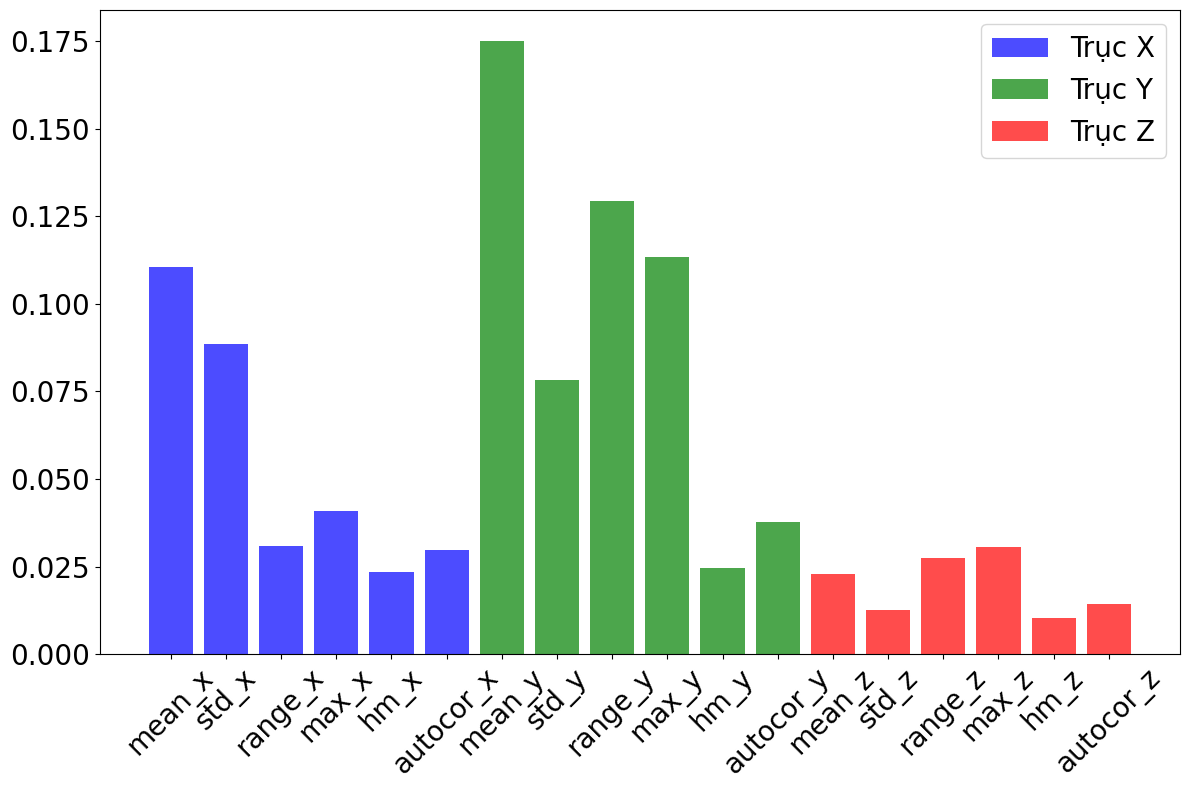

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Thêm các đặc trưng hm và autocor
feature_labels = [
    "mean_x", "mean_y", "mean_z",
    "std_x", "std_y", "std_z",
    "range_x", "range_y", "range_z",
    "max_x", "max_y", "max_z",
    "hm_x", "hm_y", "hm_z",
    "autocor_x", "autocor_y", "autocor_z"
]

importances = clf4.feature_importances_

importance_x = [importances[i] for i, label in enumerate(feature_labels) if label.endswith("_x")]
importance_y = [importances[i] for i, label in enumerate(feature_labels) if label.endswith("_y")]
importance_z = [importances[i] for i, label in enumerate(feature_labels) if label.endswith("_z")]

x_labels = [label for label in feature_labels if label.endswith("_x")]
y_labels = [label for label in feature_labels if label.endswith("_y")]
z_labels = [label for label in feature_labels if label.endswith("_z")]

plt.figure(figsize=(12, 8))
plt.bar(x_labels, importance_x, color="blue", alpha=0.7, label="Trục X")
plt.bar(y_labels, importance_y, color="green", alpha=0.7, label="Trục Y")
plt.bar(z_labels, importance_z, color="red", alpha=0.7, label="Trục Z")

plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()


In [14]:
import numpy as np
unique_classes = np.unique(label_test)
print(f"Unique classes in label_test: {unique_classes}")
print(f"Number of unique classes: {len(unique_classes)}")

Unique classes in label_test: [0 1 2 3 4 5 6]
Number of unique classes: 7




 Random Forests stuffs: 
Ma trận nhầm lẫn Random Forests: 
     0    1    2    3    4    5    6
0  434    0    0    0    0    0    0
1    0  504    0    0    0    0    0
2    0    0  540    0    0    0    0
3    0    0    4  390    0    2    0
4    0    0    0    0  420    0    0
5    0    0    0    3    0  365    0
6    0    0    0    0    0    0  528


<Figure size 800x600 with 0 Axes>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Nằm'),
  Text(1.5, 0, 'Ngồi'),
  Text(2.5, 0, 'Đứng'),
  Text(3.5, 0, 'Đi bộ'),
  Text(4.5, 0, 'Chạy bộ'),
  Text(5.5, 0, 'Đi Cầu Thang'),
  Text(6.5, 0, 'Té Ngã')])

Text(0.5, 35.72222222222221, 'Nhãn dự đoán')

Text(69.72222222222221, 0.5, 'Nhãn thật')

Text(0.5, 1.0, '')

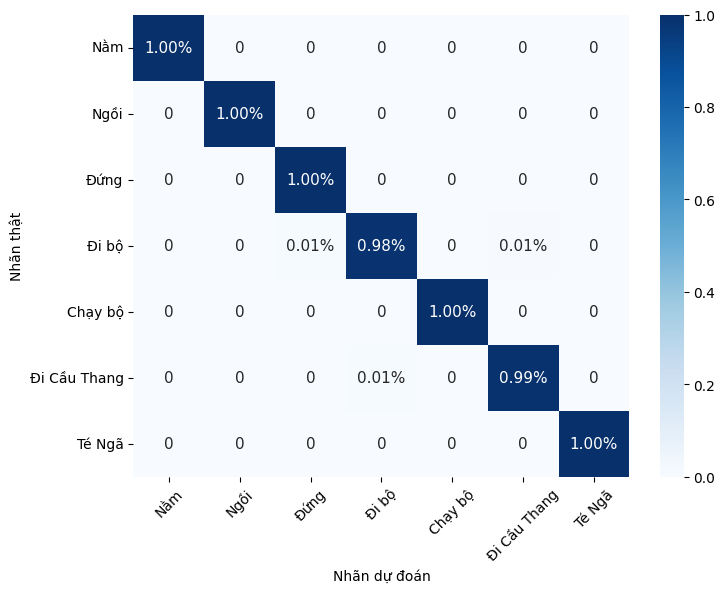

<Figure size 800x600 with 0 Axes>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'LYG'),
  Text(1.5, 0, 'SIT'),
  Text(2.5, 0, 'STD'),
  Text(3.5, 0, 'WAl'),
  Text(4.5, 0, 'JOG'),
  Text(5.5, 0, 'STA'),
  Text(6.5, 0, 'FAL')])

Text(0.5, 36.72222222222221, 'Predict label')

Text(70.72222222222221, 0.5, 'True label')

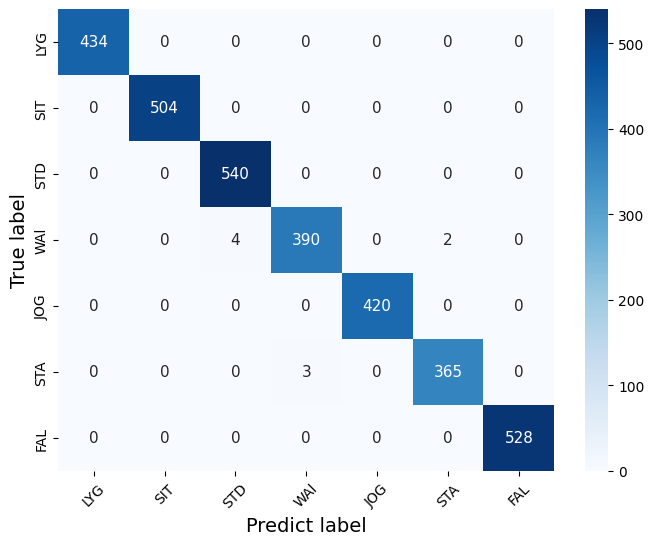

In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Giả sử confusion_test4 đã được định nghĩa từ trước
# Nếu chưa có, bạn có thể tạo thử một ma trận nhầm lẫn giả lập:
# confusion_test4 = np.array([[50, 2, 1, 0, 0, 0, 0],
#                             [5, 40, 5, 0, 0, 0, 0],
#                             [1, 3, 45, 1, 0, 0, 0],
#                             [0, 0, 2, 50, 2, 1, 0],
#                             [0, 0, 0, 5, 45, 0, 0],
#                             [0, 0, 0, 1, 2, 47, 0],
#                             [0, 0, 0, 0, 0, 0, 50]])

print('\n\n Random Forests stuffs: ')

# Xác định số lớp từ confusion_test4
num_classes = confusion_test4.shape[0]

# Tạo DataFrame với chỉ mục và cột đúng kích thước
df_cm4 = pd.DataFrame(confusion_test4, index=range(num_classes), columns=range(num_classes))

print("Ma trận nhầm lẫn Random Forests: ")
print(df_cm4)

label_test = []
y_pred = []

for true_label in df_cm4.index:
    for pred_label in df_cm4.columns:
        count = df_cm4.loc[true_label, pred_label]
        label_test.extend([true_label] * count)
        y_pred.extend([pred_label] * count)

label_test = np.array(label_test)
y_pred = np.array(y_pred)

# Danh sách nhãn tương ứng
target_names = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Chạy bộ', 'Cầu Thang', 'Ngã']

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Chuyển ma trận thành phần trăm theo từng hàng
conf_matrix = confusion_test4.astype(np.float64)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = np.where(row_sums != 0, conf_matrix / row_sums, 0)

# ✅ Vẽ Heatmap với Seaborn (kèm annot_kws để đổi cỡ chữ)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    conf_matrix_percent,
    annot=True,
    fmt=".2f",
    annot_kws={'size': 11},
    cmap="Blues",
    xticklabels=["Nằm", "Ngồi", "Đứng", "Đi bộ", "Chạy bộ", "Đi Cầu Thang", "Té Ngã"], 
    yticklabels=["Nằm", "Ngồi", "Đứng", "Đi bộ", "Chạy bộ", "Đi Cầu Thang", "Té Ngã"]
)
# Xoay nhãn trục X
plt.xticks(rotation=45)

for text in ax.texts:
    if text.get_text() == "0.00":
        text.set_text("0")
    else:
        text.set_text(f"{float(text.get_text()):.2f}%")

plt.xlabel("Nhãn dự đoán")
plt.ylabel("Nhãn thật")
plt.title("")
plt.show()

# Vẽ lại ma trận nhầm lẫn hiển thị số lượng mẫu thực tế và dự đoán (thêm annot_kws)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    confusion_test4,
    annot=True,
    fmt="d",
    annot_kws={'size': 11},
    cmap="Blues",
    xticklabels=["LYG", "SIT", "STD", "WAl", "JOG", "STA", "FAL"],
    yticklabels=["LYG", "SIT", "STD", "WAl", "JOG", "STA", "FAL"]
)
# Xoay nhãn trục X
plt.xticks(rotation=45)

plt.xlabel("Predict label", fontsize=14)
plt.ylabel("True label", fontsize=14)
plt.show()

<Figure size 700x500 with 0 Axes>

(array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
          80.,  100.]),
 [Text(-100.0, 0, '−100'),
  Text(-80.0, 0, '−80'),
  Text(-60.0, 0, '−60'),
  Text(-40.0, 0, '−40'),
  Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

(array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
          80.,  100.]),
 [Text(0, -100.0, '−100'),
  Text(0, -80.0, '−80'),
  Text(0, -60.0, '−60'),
  Text(0, -40.0, '−40'),
  Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

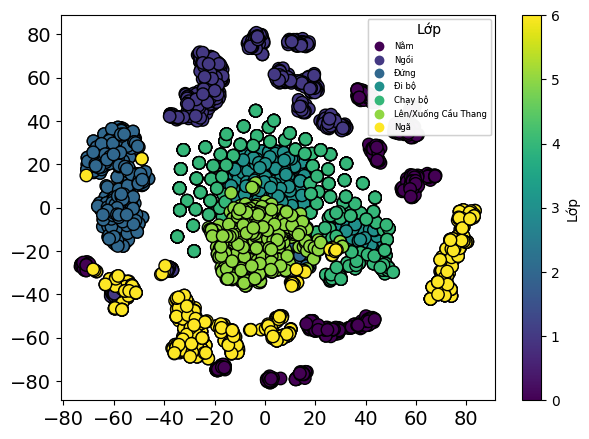

In [16]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Check if the original data exists (in numpy array or pandas dataframe format)
# Assuming the data has columns Acc_X, Acc_Y, Acc_Z in 'data_train'
# Adjust variable names to fit your actual data

# Check the length of samples in data_train
# Ensure each sample has the same length or pad/truncate the data for consistency
x1 = []
for data in data_train:
    # Assuming data contains columns Acc_X, Acc_Y, Acc_Z
    acc_data = data[['Acc_X', 'Acc_Y', 'Acc_Z']].values
    
    # Adjust length if necessary (for example: truncate or pad)
    if acc_data.shape[0] != 100:  # Assuming you want each sample to have 100 timesteps
        # Truncate data if too long
        acc_data = acc_data[:100, :]
        # Or pad if too short
        if acc_data.shape[0] < 100:
            acc_data = np.pad(acc_data, ((0, 100 - acc_data.shape[0]), (0, 0)), 'constant', constant_values=0)
    
    x1.append(acc_data.flatten())  # Flatten the sample

# Convert data to numpy array
x1 = np.array(x1)

# Check the shape of the input data
if len(x1.shape) != 2:
    raise ValueError(f"Invalid shape of x1: {x1.shape}. It should be (num_samples, num_features)")

# Data labels
y1 = np.array(label_train)

# Check the number of classes in y1
unique_labels, y1_encoded = np.unique(y1, return_inverse=True)

# Define a random seed for reproducibility
RS = 42

# Use t-SNE to reduce dimensionality
X_tsne1 = TSNE(n_components=2, perplexity=30, random_state=RS).fit_transform(x1)

# Class labels in English
labels = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Chạy bộ', 'Lên/Xuống Cầu Thang', 'Ngã']


# Define colormap
cmap = "viridis"  # You can try "plasma", "coolwarm", "jet", "inferno"...

# Plot t-SNE scatter plot
plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_tsne1[:, 0], X_tsne1[:, 1], c=y1_encoded, cmap=cmap, s=80, edgecolors='black', alpha=1) 

# Set title and axis labels
plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Lớp')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend with smaller font size
legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=labels, title="Lớp", fontsize=6, loc='upper right')
plt.gca().add_artist(legend1)

# Display the plot
plt.show()


In [17]:
def hjorth_parameters(sig):
    """Tính toán Hjorth Mobility và Complexity cho tín hiệu đầu vào."""
    first_deriv = np.diff(sig)
    second_deriv = np.diff(first_deriv)

    var0 = np.var(sig)
    var1 = np.var(first_deriv)
    var2 = np.var(second_deriv)

    mobility = np.sqrt(var1/var0) if var0 != 0 else 0
    complexity = np.sqrt(var2/var1) if var1 != 0 else 0
    return mobility, complexity

# Bạn cũng cần hàm autocorrelation, nếu chưa được định nghĩa ở đâu khác:
def autocorrelation(x, lag=1):
    """Tính tự tương quan cho độ trễ nhất định."""
    n = len(x)
    mean_x = np.mean(x)
    c0 = np.sum((x - mean_x) ** 2)
    if c0 == 0:
        return 0
    c1 = np.sum((x[:n-lag] - mean_x) * (x[lag:] - mean_x))
    return c1 / c0

# Sửa lại phần trích xuất đặc trưng để tính cho cả 3 trục (X, Y, Z)
x1 = []
for data in data_train:
    acc_data = data[['Acc_X', 'Acc_Y', 'Acc_Z']].values
    ax, ay, az = acc_data[:, 0], acc_data[:, 1], acc_data[:, 2]

    # Tính trung bình, độ lệch chuẩn, range, RMS, IQR... cho từng trục
    mean_xyz = [np.mean(ax), np.mean(ay), np.mean(az)]
    std_xyz = [np.std(ax), np.std(ay), np.std(az)]
    range_xyz = [np.ptp(ax), np.ptp(ay), np.ptp(az)]
    rms_xyz = [np.sqrt(np.mean(ax**2)), np.sqrt(np.mean(ay**2)), np.sqrt(np.mean(az**2))]
    iqr_xyz = [
        np.percentile(ax, 75) - np.percentile(ax, 25),
        np.percentile(ay, 75) - np.percentile(ay, 25),
        np.percentile(az, 75) - np.percentile(az, 25)
    ]

    # Tính Hjorth Parameters & Autocorrelation cho từng trục
    hjorth_mob, hjorth_com, autocorr_vals = [], [], []
    for axis_data in [ax, ay, az]:
        m, c = hjorth_parameters(axis_data)
        hjorth_mob.append(m)
        hjorth_com.append(c)
        autocorr_vals.append(autocorrelation(axis_data))

    # Tổng hợp thành một vector đặc trưng
    features = np.concatenate([
        mean_xyz, std_xyz, range_xyz, rms_xyz,
        iqr_xyz, hjorth_mob, hjorth_com, autocorr_vals
    ])
    x1.append(features)

x1 = np.array(x1)  # x1 lúc này chứa đặc trưng từ nhiều trục


<Figure size 700x500 with 0 Axes>

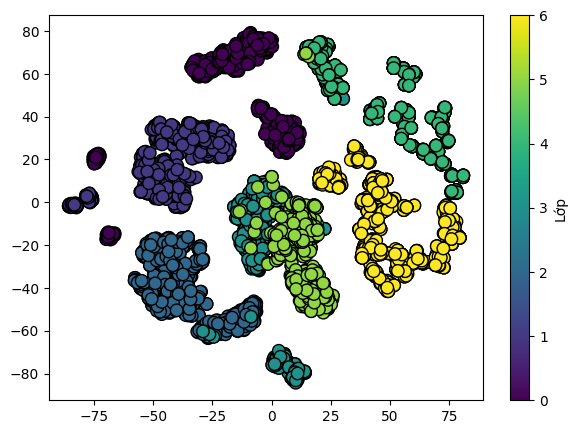

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from statsmodels.tsa.stattools import acf

# ✅ Hàm tính Hjorth Mobility & Complexity
def hjorth_parameters(x):
    if len(x) < 2:
        return 0, 0
    
    first_deriv = np.diff(x)
    second_deriv = np.diff(first_deriv)
    
    var_zero = np.var(x)
    var_d1 = np.var(first_deriv)
    var_d2 = np.var(second_deriv)
    
    mobility = np.sqrt(var_d1 / var_zero) if var_zero > 0 else 0
    
    
    return mobility

# ✅ Hàm tính Autocorrelation
def autocorrelation(x):
    """Tính Autocorrelation bậc 1 của dữ liệu"""
    if len(x) > 1:
        acf_vals = acf(x, nlags=1, fft=True)
        return acf_vals[1] if len(acf_vals) > 1 else 0
    return 0

# ✅ Trích xuất đặc trưng từ tập train
x1 = []
for data in data_train:
    acc_data = data[['Acc_X', 'Acc_Y', 'Acc_Z']].values  # Chuyển thành numpy array

    # ✅ Tính các đặc trưng
    mean_data = np.mean(acc_data, axis=0)
    std_data = np.std(acc_data, axis=0)
    max_data = np.max(acc_data, axis=0)
    range_data = np.ptp(acc_data, axis=0)  # Range = max - min

    # ✅ Tính Hjorth Parameters & Autocorrelation
    hjorth_mobility = []
    autocorr_vals = []

    for axis in range(acc_data.shape[1]):
        mobility = hjorth_parameters(acc_data[:, axis])
        hjorth_mobility.append(mobility)
        autocorr_vals.append(autocorrelation(acc_data[:, axis]))

    # ✅ Kết hợp tất cả các đặc trưng thành một vector
    combined_features = np.concatenate((mean_data, std_data, max_data, range_data, hjorth_mobility, autocorr_vals))
    
    x1.append(combined_features)

# ✅ Chuyển danh sách thành numpy array
x1 = np.array(x1)

# ✅ Kiểm tra hình dạng dữ liệu
if x1.ndim != 2:
    raise ValueError(f"Invalid shape of x1: {x1.shape}. It should be (num_samples, num_features)")

# ✅ Chuyển đổi nhãn
y1 = np.array(label_train)
unique_labels, y1_encoded = np.unique(y1, return_inverse=True)

# ✅ T-SNE giảm số chiều xuống 2D
RS = 1000
X_tsne1 = TSNE(n_components=2, perplexity=30, random_state=RS).fit_transform(x1)

# ✅ Định nghĩa tên nhãn
labels = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Chạy bộ', 'Lên/Xuống Cầu Thang', 'Ngã']

# ✅ Định nghĩa colormap
cmap = "viridis"

# ✅ Vẽ đồ thị t-SNE
plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_tsne1[:, 0], X_tsne1[:, 1], c=y1_encoded, cmap=cmap, s=80, edgecolors='black', alpha=1)

# ✅ Thêm tiêu đề
# plt.title("Dữ liệu sau phân đoạn với cửa sổ 6 giây", fontsize=12)
plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Lớp')

# # ✅ Thêm legend
# legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=labels, title="Lớp", fontsize=20, loc='upper right')
# plt.gca().add_artist(legend1)

# ✅ Hiển thị đồ thị
plt.show()


<Figure size 1500x700 with 0 Axes>

<BarContainer object of 7 artists>

Text(0, 1087, '1086')

Text(1, 1261, '1260')

Text(2, 1352, '1351')

Text(3, 992, '991')

Text(4, 1051, '1050')

Text(5, 923, '922')

Text(6, 1321, '1320')

Text(0.5, 0, 'Hoạt động')

Text(0, 0.5, 'Số lượng mẫu')

Text(0.5, 1.0, 'Phân bố dữ liệu theo hoạt động')

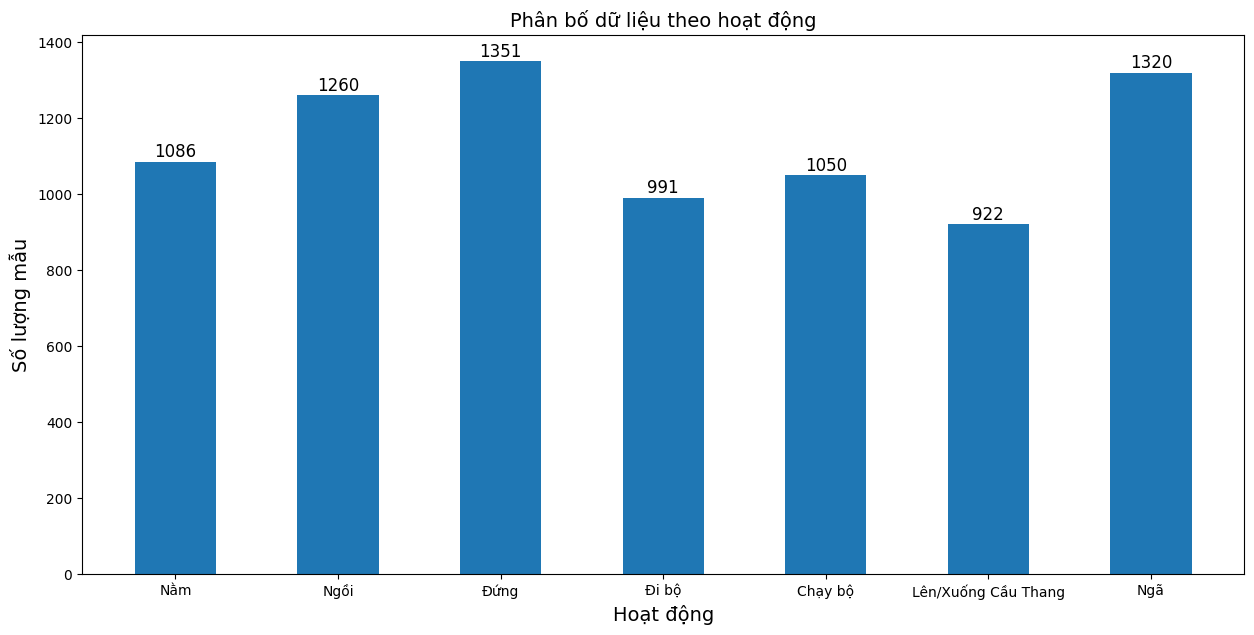

In [19]:
import matplotlib.pyplot as plt

# Danh sách nhãn và số lượng mẫu của từng lớp
labels = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Chạy bộ', 'Lên/Xuống Cầu Thang', 'Ngã']
Value_y = [len(w_Lying), len(w_Sitting), len(w_Standing), len(w_Walking), len(w_Jogging), len(w_Stairing), len(w_Falling)]

# Tạo trục x tương ứng
x_values = list(range(len(labels)))

plt.figure(figsize=(15, 7))
plt.bar(x=x_values, height=Value_y, width=0.5, tick_label=labels)

# Thêm giá trị trên từng cột
for i in range(len(labels)):  
    plt.text(x=x_values[i], y=Value_y[i] + 1, s=str(Value_y[i]), 
             horizontalalignment='center', verticalalignment='bottom', size=12)

plt.xlabel("Hoạt động", fontsize=14)
plt.ylabel("Số lượng mẫu", fontsize=14)
plt.title("Phân bố dữ liệu theo hoạt động", fontsize=14)
plt.show()




 Random Forests stuffs: 
Ma trận nhầm lẫn Random Forests: 
     0    1    2    3    4    5    6
0  434    0    0    0    0    0    0
1    0  504    0    0    0    0    0
2    0    0  540    0    0    0    0
3    0    0    4  390    0    2    0
4    0    0    0    0  420    0    0
5    0    0    0    3    0  365    0
6    0    0    0    0    0    0  528


<Figure size 800x600 with 0 Axes>

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 35.72222222222221, 'Nhãn dự đoán')

Text(69.72222222222221, 0.5, 'Nhãn thật')

Text(0.5, 1.0, '')

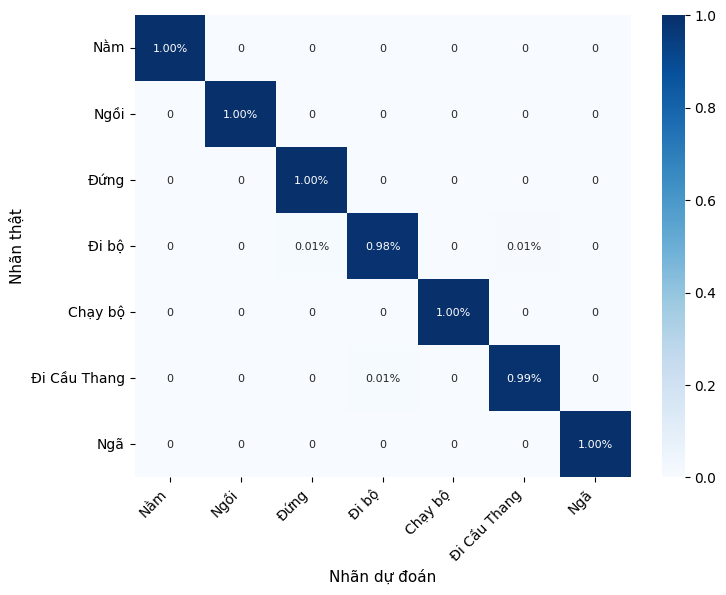

<Figure size 800x600 with 0 Axes>

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 35.72222222222221, 'Nhãn dự đoán')

Text(69.72222222222221, 0.5, 'Nhãn thật')

Text(0.5, 1.0, '')

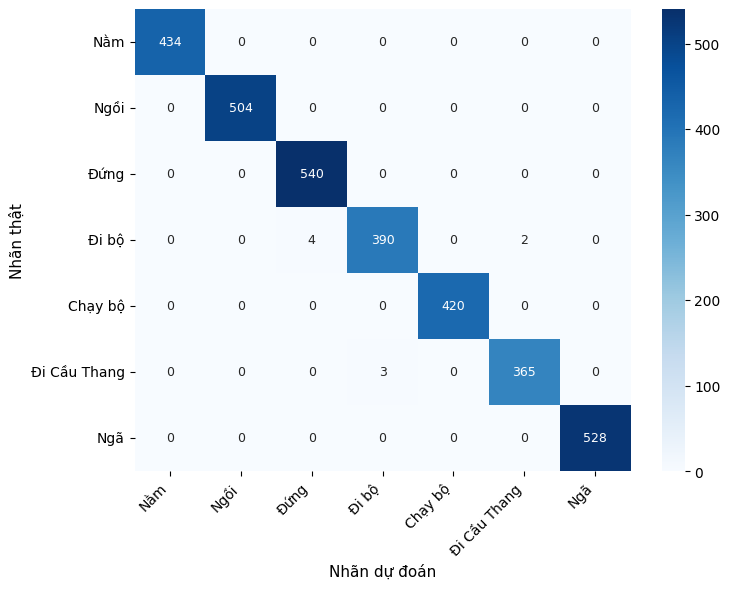

In [20]:
# Giữ nguyên code, chỉ thêm phần xoay nhãn trên trục X và giảm kích thước chữ cho xlabel, ylabel

print('\n\n Random Forests stuffs: ')

# Xác định số lớp từ confusion_test4
num_classes = confusion_test4.shape[0]

# Tạo DataFrame với chỉ mục và cột đúng kích thước
df_cm4 = pd.DataFrame(confusion_test4, index=range(num_classes), columns=range(num_classes))

print("Ma trận nhầm lẫn Random Forests: ")
print(df_cm4)

label_test = []
y_pred = []

for true_label in df_cm4.index:
    for pred_label in df_cm4.columns:
        count = df_cm4.loc[true_label, pred_label]
        label_test.extend([true_label] * count)
        y_pred.extend([pred_label] * count)

label_test = np.array(label_test)
y_pred = np.array(y_pred)

# Danh sách nhãn tương ứng
target_names = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Chạy bộ', 'Cầu Thang', 'Ngã']

# ✅ Chuyển ma trận thành phần trăm theo từng hàng
conf_matrix = confusion_test4.astype(np.float64)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = np.where(row_sums != 0, conf_matrix / row_sums, 0)

# ✅ Vẽ Heatmap với Seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    conf_matrix_percent,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=["Nằm", "Ngồi", "Đứng", "Đi bộ", "Chạy bộ", "Đi Cầu Thang", "Ngã"],
    yticklabels=["Nằm", "Ngồi", "Đứng", "Đi bộ", "Chạy bộ", "Đi Cầu Thang", "Ngã"],
    annot_kws={"size": 8}  # Giữ nguyên số trong bảng, chỉ giảm cỡ chữ ô
)

# Xoay nhãn trục X
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Giữ nguyên số 0, còn lại hiển thị dưới dạng "xx.xx%"
for text in ax.texts:
    if text.get_text() == "0.00":
        text.set_text("0")
    else:
        text.set_text(f"{float(text.get_text()):.2f}%")

plt.xlabel("Nhãn dự đoán", fontsize=11)  # Giảm kích cỡ chữ nhãn trục X
plt.ylabel("Nhãn thật", fontsize=11)    # Giảm kích cỡ chữ nhãn trục Y
plt.title("")
plt.show()

# Vẽ lại ma trận nhầm lẫn hiển thị số lượng mẫu thực tế và dự đoán
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    confusion_test4,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Nằm", "Ngồi", "Đứng", "Đi bộ", "Chạy bộ", "Đi Cầu Thang", "Ngã"],
    yticklabels=["Nằm", "Ngồi", "Đứng", "Đi bộ", "Chạy bộ", "Đi Cầu Thang", "Ngã"],
    annot_kws={"size": 9}  # Giữ nguyên số trong bảng, chỉ giảm cỡ chữ ô
)

# Xoay nhãn trục X
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.xlabel("Nhãn dự đoán", fontsize=11)  # Giảm kích cỡ chữ nhãn trục X
plt.ylabel("Nhãn thật", fontsize=11)    # Giảm kích cỡ chữ nhãn trục Y
plt.title("")
plt.show()


In [21]:
import numpy as np
unique_classes = np.unique(label_test)
print(f"Unique classes in label_test: {unique_classes}")
print(f"Number of unique classes: {len(unique_classes)}")

Unique classes in label_test: [0 1 2 3 4 5 6]
Number of unique classes: 7


In [22]:
import joblib

# filepath: c:\Users\quang\OneDrive\Máy tính\DatasetQA\Fall_20Hz.ipynb
import nest_asyncio
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from micromlgen import port
import re

# Áp dụng nest_asyncio trong Jupyter
nest_asyncio.apply()

# Ví dụ dữ liệu (train_features/test_features/label_train/label_test)
# Bạn cần chuẩn bị sẵn train_features, label_train, test_features, label_test
# Bảo đảm label_train và label_test chứa đủ 7 nhãn
# train_features = ...
# label_train = ...
# test_features = ...
# label_test = ...

train_features = np.array(train_features)
test_features = np.array(test_features)
label_train = np.array(label_train)
label_test = np.array(label_test)

# Huấn luyện RandomForest
clf4 = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42).fit(train_features, label_train)

# Danh sách nhãn 7 lớp
labels = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Chạy bộ', 'Cầu Thang', 'Ngã']
class_map = {i: labels[i] for i in range(len(labels))}

# Xuất mô hình sang C++ với micromlgen
model_code = port(clf4, classmap=class_map)

# Tạo header file (RF_6axis.h) nối kèm extern
header_code = """#pragma once
#include <cstdarg>

// Khai báo biến clf toàn cục
namespace Eloquent {
    namespace ML {
        namespace Port {
            extern class RandomForest clf; // Dùng extern để tránh định nghĩa lại
        }
    }
}
""" + model_code

# Tạo source file (RF_6axis.cpp) định nghĩa clf
source_code = """#include "RF_6axis.h"

// Khởi tạo biến clf
Eloquent::ML::Port::RandomForest clf;
"""

# Ghi vào tệp
h_path = r'C:\Users\quang\OneDrive\Máy tính\DatasetQA\RF_6axis.h'
cpp_path = r'C:\Users\quang\OneDrive\Máy tính\DatasetQA\RF_6axis.cpp'
with open(h_path, 'w', encoding='utf-8') as file:
    file.write(header_code)

with open(cpp_path, 'w', encoding='utf-8') as file:
    file.write(source_code)

# Kiểm tra độ chính xác
predicted_RF = clf4.predict(test_features)
confusion_test_RF = confusion_matrix(label_test, predicted_RF)
acc_train = clf4.score(train_features, label_train)
acc_test = clf4.score(test_features, label_test)

print(f"🔥 Độ chính xác (train): {acc_train:.3f}")
print(f"🔥 Độ chính xác (test):  {acc_test:.3f}")
print("Ma trận nhầm lẫn (test):")
print(confusion_test_RF)

# (Tùy chọn) Kiểm tra nội dung RF_6axis.h xem có 7 lớp
with open(h_path, 'r', encoding='utf-8') as f:
    content = f.read()

if 'votes[7]' in content:
    print("Đã thấy votes[7] trong RF_6axis.h (cho 7 lớp).")
else:
    print("Chưa tìm thấy votes[7], có thể mô hình thực tế chỉ 3 lớp.")

cases = set(re.findall(r'case\s+([0-6])\s*:', content))
if len(cases) == 7:
    print("RF_6axis.h có đủ case 0..6.")
else:
    print(f"Chưa đủ 7 lớp, chỉ thấy {len(cases)} lớp được khai báo.")

# Thêm phần lưu mô hình đã huấn luyện vào file .pkl
joblib.dump(clf4, 'trained_rf_model.pkl')

100058

82

🔥 Độ chính xác (train): 0.998
🔥 Độ chính xác (test):  0.997
Ma trận nhầm lẫn (test):
[[434   0   0   0   0   0   0]
 [  0 504   0   0   0   0   0]
 [  0   0 540   0   0   0   0]
 [  0   0   4 390   0   2   0]
 [  0   0   0   0 420   0   0]
 [  0   0   0   3   0 365   0]
 [  0   0   0   0   0   0 528]]
Đã thấy votes[7] trong RF_6axis.h (cho 7 lớp).
RF_6axis.h có đủ case 0..6.


['trained_rf_model.pkl']

In [23]:
import re

path = r'C:\Users\quang\OneDrive\Máy tính\DatasetQA\RF_6axis.h'

with open(path, 'r', encoding='utf-8') as f:
    content = f.read()

# Kiểm tra xem có votes[7] không
if 'votes[7]' in content:
    print("Đã khai báo mảng phiếu cho 7 lớp.")
else:
    print("Chưa tìm thấy khai báo mảng 7 lớp (votes[7]).")

# Kiểm tra xem đủ nhãn 0..6 không
pattern = r'case\s+([0-6]):'
cases = re.findall(pattern, content)
unique_cases = set(cases)

if len(unique_cases) == 7:
    print("Có đầy đủ case 0..6 cho 7 lớp.")
else:
    print(f"Chưa đủ 7 lớp, chỉ thấy {len(unique_cases)} lớp được khai báo.")

Đã khai báo mảng phiếu cho 7 lớp.
Có đầy đủ case 0..6 cho 7 lớp.


In [24]:
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sb
# from sklearn.utils.multiclass import unique_labels
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# # ['Lying', 'Sitting', 'Standing', 'Walking', 'Falling']
# # Updated target names with an additional class
# target_names = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ','Chạy bộ', 'Leo Cầu Thang', 'Ngã' ]
# labels = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ','Chạy bộ', 'Leo Cầu Thang', 'Ngã' ]

# # Predict the labels for test data
# y_pred = clf4.predict(test_features)

# # Convert target names to a numpy array
# labels = np.array(target_names)

# def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, fmt='g'):
#     # Compute confusion matrix
#     cm = confusion_matrix(y_true, y_pred)
#     # Only use the labels that appear in the data
#     unique_class_labels = unique_labels(y_true, y_pred)
#     class_labels = classes[unique_class_labels]

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Chuyển sang phần trăm
#         print("Ma trận nhầm lẫn đã chuẩn hóa (tính theo %)")
#     else:
#         cm = cm.astype('float')
#         print('Ma trận nhầm lẫn, không chuẩn hóa')


#     print(cm)

#     fig, ax = plt.subplots()
#     # Create a DataFrame for the heatmap
#     dataFrame = pd.DataFrame(cm, index=class_labels, columns=class_labels)
#     # Create a heatmap
#     sb.heatmap(dataFrame, annot=True, fmt=fmt, cmap='Blues')
#     for text in ax.texts:
#         if text.get_text() == "0.00":  
#             text.set_text("0")  # Nếu là 0.00 thì giữ nguyên
#         else:
#             text.set_text(f"{float(text.get_text()):.2f}%")  # Chuyển thành dạng % với 2 số sau dấu phẩy

#     ax.set(xticklabels=class_labels, yticklabels=class_labels,
#            title=title,
#         #    ylabel='True Label',  # True Label
#         #    xlabel='Predicted Label')
#            ylabel='Hành động thật',  # True Label
#            xlabel='Dự đoán')

#      # Predicted Label
#     ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=12)

#     sb.set(font_scale=1)

# np.set_printoptions(precision=2)
# pd.options.display.float_format = '{:.2f}'.format


# # Plot normalized confusion matrix
# plot_confusion_matrix(label_test, y_pred, classes=labels,title='\nMa trận nhầm lẫn chuẩn hóa', normalize=True,fmt='.3f')  # Normalized Confusion Matrix


Accuracy of RF classifier on training set: 0.998
Accuracy of RF classifier on test set: 0.997

Classification Report on Test Data (Random Forest):

Detailed Classification Report:
                  precision    recall  f1-score          acc       NPV
Nằm                1.000000  1.000000  1.000000     1.000000  1.000000
Ngồi               1.000000  1.000000  1.000000     1.000000  1.000000
Đứng               0.992647  1.000000  0.996310     0.998746  1.000000
Đi bộ              0.992366  0.984848  0.988593     0.997179  0.997855
Chạy bộ            1.000000  1.000000  1.000000     1.000000  1.000000
Leo Cầu Thang      0.994550  0.991848  0.993197     0.998433  0.998937
Ngã                1.000000  1.000000  1.000000     1.000000  1.000000
accuracy           0.997179  0.997179  0.997179     0.997179       NaN
macro avg          0.997081  0.996671  0.996871  3190.000000       NaN
weighted avg       0.997179  0.997179  0.997175  3190.000000       NaN
overall_accuracy   0.997179       NaN  

(0.0, 1.0, 0.0, 1.0)

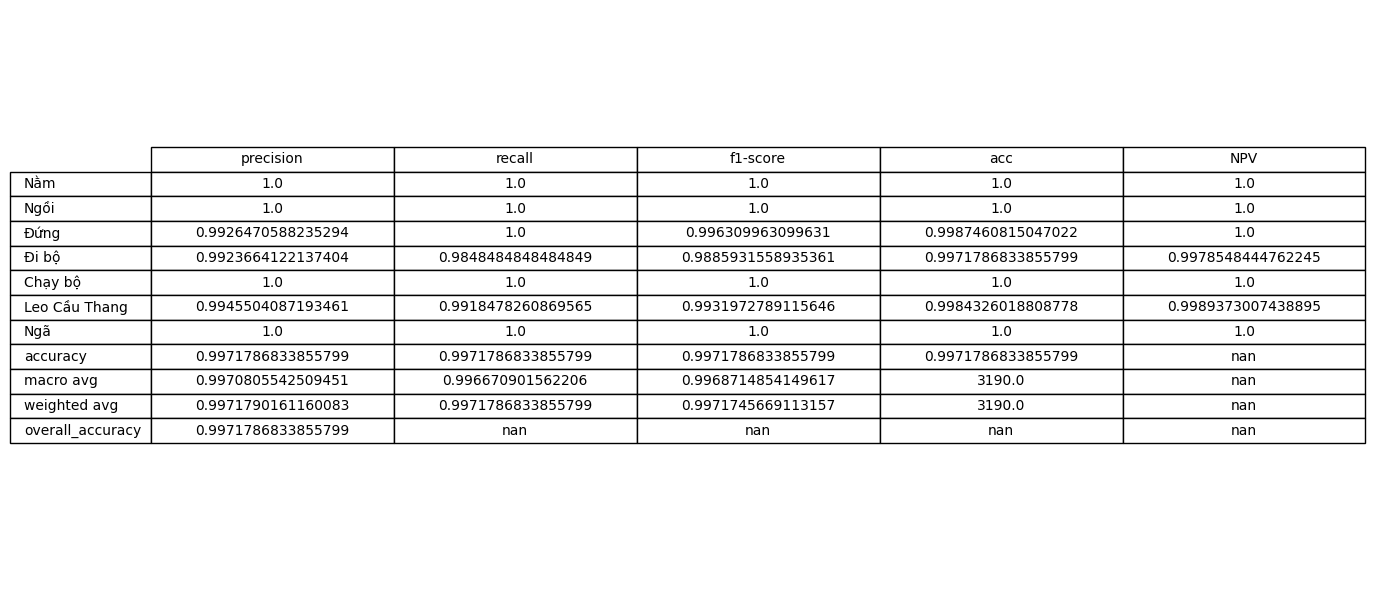

In [25]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# Huấn luyện mô hình Random Forest
clf4 = RandomForestClassifier(
    n_estimators=20,
    max_depth=5,
    random_state=42
).fit(train_features, label_train)
# Dự đoán trên tập test
predicted_RF = clf4.predict(test_features)

# Đánh giá mô hình
train_accuracy = clf4.score(train_features, label_train)
test_accuracy = clf4.score(test_features, label_test)

print(f"Accuracy of RF classifier on training set: {train_accuracy:.3f}")
print(f"Accuracy of RF classifier on test set: {test_accuracy:.3f}")

# Cập nhật các nhãn với tên thật của các hành động
target_names = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ','Chạy bộ', 'Leo Cầu Thang', 'Ngã' ]
labels = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ','Chạy bộ', 'Leo Cầu Thang', 'Ngã' ]

# Predict the labels for test data
train_features = np.array(train_features)
test_features = np.array(test_features)
label_train = np.array(label_train)
label_test = np.array(label_test)

# 📌 Danh sách nhãn
labels = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Chạy bộ', 'Cầu Thang', 'Ngã']
class_map = {i: label for i, label in enumerate(labels)}
# Convert target names to a numpy array
labels = np.array(target_names)

# Báo cáo chi tiết với các nhãn hành động thực tế
print("\nClassification Report on Test Data (Random Forest):")
classification_rep = classification_report(label_test, predicted_RF, target_names=target_names, output_dict=True)

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(label_test, predicted_RF)

# Chuyển đổi ma trận nhầm lẫn thành DataFrame để tính NPV
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

# Tính NPV cho từng lớp
NPV_values = []
for i in range(len(target_names)):
    TN = cm_df.drop(index=target_names[i], columns=target_names[i]).values.sum()
    FN = cm_df.loc[target_names[i], :].drop(target_names[i]).sum()
    NPV = TN / (TN + FN) if (TN + FN) > 0 else 0
    NPV_values.append(NPV)

# Tạo DataFrame từ báo cáo chi tiết
classification_df = pd.DataFrame(classification_rep).transpose()

# Thêm độ chính xác tổng quát (overall accuracy) vào bảng
classification_df.loc['overall_accuracy'] = [accuracy_score(label_test, predicted_RF), None, None, None]

# Thêm giá trị NPV vào DataFrame
classification_df.loc[target_names, 'NPV'] = NPV_values

# ================== Thay thế cột support bằng cột accuracy (acc) ==================
class_accuracies = []
total = cm.sum()
for i, cls in enumerate(target_names):
    TP = cm[i, i]
    row_sum = cm[i, :].sum()
    col_sum = cm[:, i].sum()
    FN = row_sum - TP
    FP = col_sum - TP
    TN = total - (TP + FP + FN)
    acc_i = (TP + TN) / total if total else 0
    class_accuracies.append(acc_i)

for idx, cls in enumerate(target_names):
    classification_df.at[cls, 'support'] = class_accuracies[idx]

classification_df.rename(columns={'support': 'acc'}, inplace=True)
# =============================================================================

# Hiển thị bảng
print("\nDetailed Classification Report:")
print(classification_df)

# Vẽ bảng bằng matplotlib
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('off')
table = ax.table(cellText=classification_df.values,
                 colLabels=classification_df.columns,
                 rowLabels=classification_df.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.show()


In [26]:
labels_in_model = clf4.classes_
print("Các labels có trong mô hình:")
for idx, label_name in enumerate(labels_in_model):
    print(f"{idx}. {label_name}")

Các labels có trong mô hình:
0. 0
1. 1
2. 2
3. 3
4. 4
5. 5
6. 6


Evaluating Decision Tree...
Evaluating Gradient Boosting...
Evaluating SVM...
Evaluating Random Forest...
Evaluating K-NN...
          Classifier  ACC (%)     RE (%)    NPV (%)  Precision (%)
0      Decision Tree     95.0  94.747475  97.517241      94.747475
1  Gradient Boosting     95.0  94.747475  97.517241      94.747475
2                SVM     90.0  89.985570  95.039683      90.277778
3      Random Forest     95.0  94.747475  97.517241      94.747475
4               K-NN     87.5  86.305916  94.092391      89.673203


<BarContainer object of 5 artists>

Text(0, 0.5, 'ACC (%)')

Text(0.5, 0, 'Classifier')

Text(0, 95.0, '95.0%')

Text(1, 95.0, '95.0%')

Text(2, 90.0, '90.0%')

Text(3, 95.0, '95.0%')

Text(4, 87.5, '87.5%')

<BarContainer object of 5 artists>

Text(0, 0.5, 'RE (%)')

Text(0.5, 0, 'Classifier')

Text(0, 94.74747474747475, '94.7%')

Text(1, 94.74747474747475, '94.7%')

Text(2, 89.98556998556998, '90.0%')

Text(3, 94.74747474747475, '94.7%')

Text(4, 86.3059163059163, '86.3%')

<BarContainer object of 5 artists>

Text(0, 0.5, 'Precision (%)')

Text(0.5, 0, 'Classifier')

Text(0, 94.74747474747475, '94.7%')

Text(1, 94.74747474747475, '94.7%')

Text(2, 90.27777777777779, '90.3%')

Text(3, 94.74747474747475, '94.7%')

Text(4, 89.6732026143791, '89.7%')

<BarContainer object of 5 artists>

Text(0, 0.5, 'NPV (%)')

Text(0.5, 0, 'Classifier')

Text(0, 97.51724137931035, '97.5%')

Text(1, 97.51724137931035, '97.5%')

Text(2, 95.03968253968254, '95.0%')

Text(3, 97.51724137931035, '97.5%')

Text(4, 94.09239130434783, '94.1%')

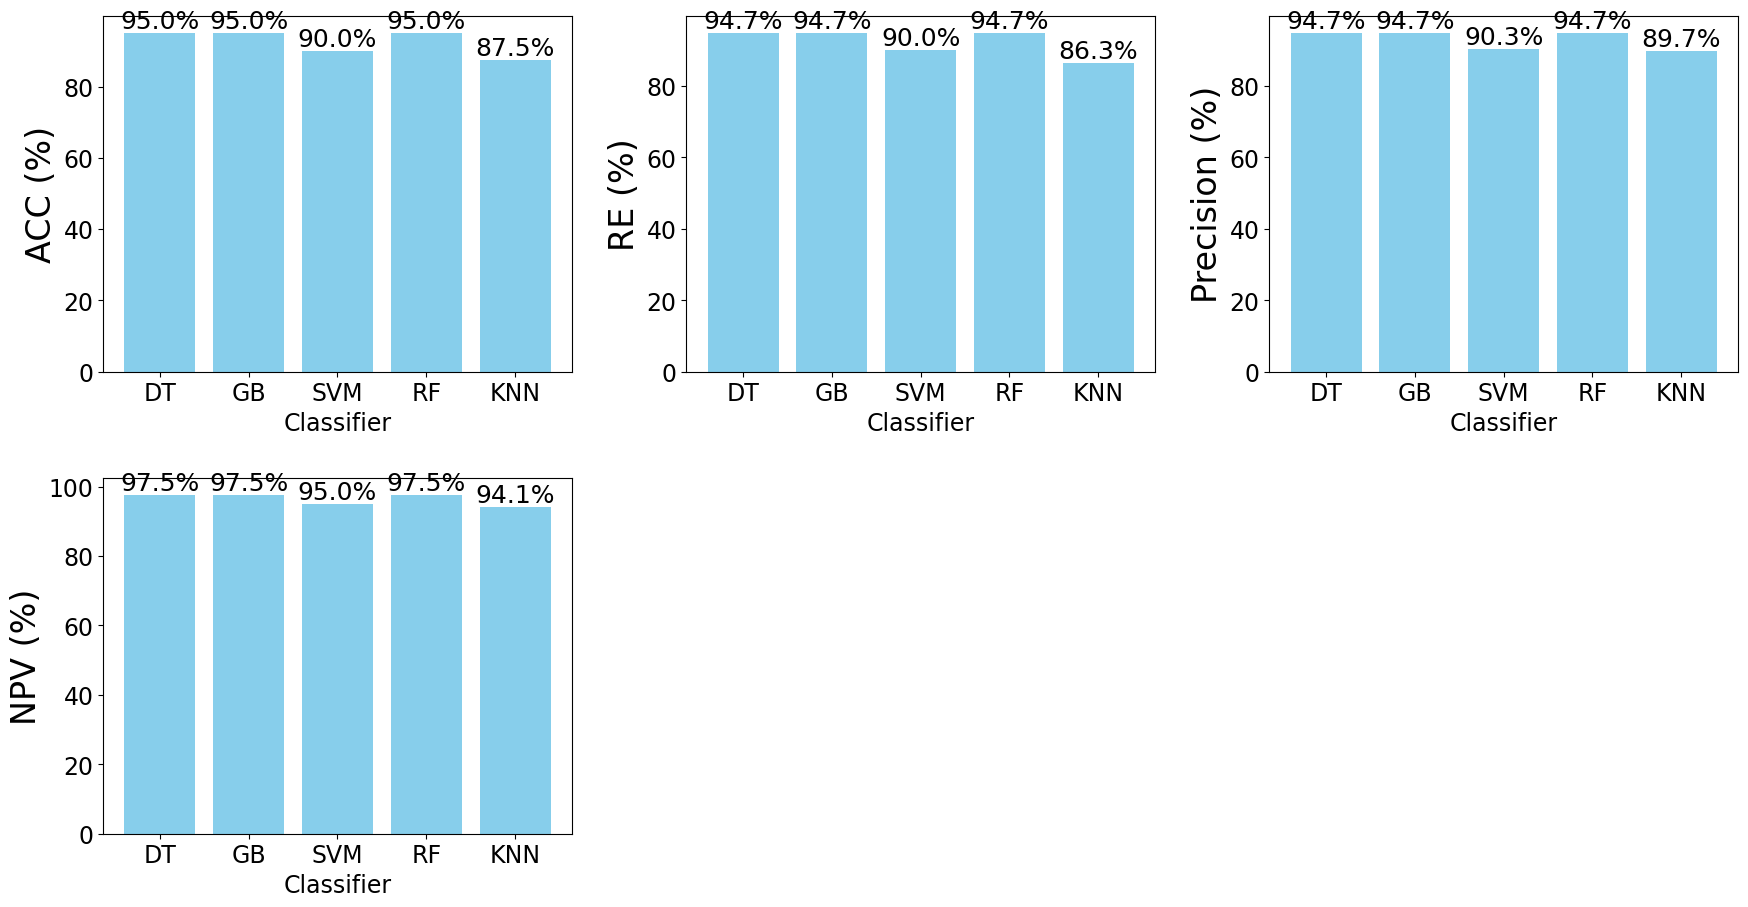

In [27]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 24})

X, y = make_classification(n_samples=100, n_features=15, n_classes=3, n_clusters_per_class=1, random_state=42)
train_features, test_features, label_train, label_test = train_test_split(X, y, test_size=0.4, random_state=42)

metrics = {
    "Classifier": [],
    "ACC (%)": [],
    "RE (%)": [],
    "NPV (%)": [],
    "Precision (%)": []
}

def compute_metrics(y_true, y_pred, model_name, train_time, test_time):
    cm = confusion_matrix(y_true, y_pred)
    n_classes = cm.shape[0]
    npv_list = []
    for i in range(n_classes):
        tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
        fn = cm[i, :].sum() - cm[i, i]
        npv_i = tn / (tn + fn) if (tn + fn) != 0 else 0
        npv_list.append(npv_i)
    npv = np.mean(npv_list) * 100

    report = classification_report(y_true, y_pred, output_dict=True)
    acc = report['accuracy'] * 100
    re = report['macro avg']['recall'] * 100
    precision = report['macro avg']['precision'] * 100

    metrics["Classifier"].append(model_name)
    metrics["ACC (%)"].append(acc)
    metrics["RE (%)"].append(re)
    metrics["Precision (%)"].append(precision)
    metrics["NPV (%)"].append(npv)

def evaluate_classifier(clf, train_features, test_features, label_train, label_test, model_name):
    start_time = time.time()
    clf.fit(train_features, label_train)
    train_time = time.time() - start_time

    start_time = time.time()
    predicted = clf.predict(test_features)
    test_time = time.time() - start_time

    compute_metrics(label_test, predicted, model_name, train_time, test_time)

classifiers = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=20, max_depth=4, learning_rate=0.05, subsample=0.2, random_state=42),
    "SVM": SVC(gamma='scale', random_state=42, C=0.5),
    "Random Forest": RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42),
    "K-NN": KNeighborsClassifier(n_neighbors=20, weights='uniform')
}

for clf_name, clf in classifiers.items():
    print(f"Evaluating {clf_name}...")
    evaluate_classifier(clf, train_features, test_features, label_train, label_test, clf_name)

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Thay đổi hàm wrap_label để dùng tên viết tắt
def wrap_label(label):
    abbreviations = {
        "Decision Tree": "DT",
        "Gradient Boosting": "GB",
        "SVM": "SVM",
        "Random Forest": "RF",
        "K-NN": "KNN"
    }
    return abbreviations.get(label, label)

metrics_to_plot = ["ACC (%)", "RE (%)", "Precision (%)", "NPV (%)"]
num_metrics = len(metrics_to_plot)
num_rows = (num_metrics + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    wrapped_classifiers = [wrap_label(c) for c in metrics_df["Classifier"]]

    ax.bar(wrapped_classifiers, metrics_df[metric], color='skyblue')
    ax.set_ylabel(metric, fontsize=24)
    ax.set_xlabel("Classifier", fontsize=17)
    ax.tick_params(axis='both', labelsize=17)

    for idx, val in enumerate(metrics_df[metric]):
        if val is not None:
            if " (%)" in metric:
                ax.text(idx, val, f"{val:.1f}%", ha='center', va='bottom', fontsize=18)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [28]:
# import time
# import numpy as np
# import pandas as pd
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.pyplot as plt

# # Example dataset (Replace this with your own data loading code)
# # Creating a synthetic dataset for demonstration



# # Initialize metrics storage
# metrics = {
#     "Classifier": [],
#     "ACC (%)": [],
#     "SEN (%)": [],
#     "PPV (%)": [],
#     "NPV (%)": [],
#     "TrT (s)": [],
#     "TeT (s)": []
# }

# # Function to compute metrics
# def compute_metrics(y_true, y_pred, model_name, train_time, test_time):
#     conf_matrix = confusion_matrix(y_true, y_pred)
#     total = conf_matrix.sum()
#     num_classes = conf_matrix.shape[0]

#     acc = []
#     sen = []
#     ppv = []
#     npv = []

#     for class_index in range(num_classes):
#         TP = conf_matrix[class_index, class_index]
#         FN = conf_matrix[class_index, :].sum() - TP
#         FP = conf_matrix[:, class_index].sum() - TP
#         TN = total - (TP + FN + FP)

#         ACC = (TP + TN) / total * 100
#         SEN = TP / (TP + FN) * 100 if (TP + FN) > 0 else 0
#         PPV = TP / (TP + FP) * 100 if (TP + FP) > 0 else 0
#         NPV = TN / (TN + FN) * 100 if (TN + FN) > 0 else 0

#         acc.append(ACC)
#         sen.append(SEN)
#         ppv.append(PPV)
#         npv.append(NPV)

#     metrics["Classifier"].append(model_name)
#     metrics["ACC (%)"].append(np.mean(acc))  # Average over all classes
#     metrics["SEN (%)"].append(np.mean(sen))  # Average over all classes
#     metrics["PPV (%)"].append(np.mean(ppv))  # Average over all classes
#     metrics["NPV (%)"].append(np.mean(npv))  # Average over all classes
#     metrics["TrT (s)"].append(train_time)
#     metrics["TeT (s)"].append(test_time)

# # Classifier Evaluation Function
# def evaluate_classifier(clf, train_features, test_features, label_train, label_test, model_name):
#     start_time = time.time()
#     clf.fit(train_features, label_train)
#     train_time = time.time() - start_time

#     start_time = time.time()
#     predicted = clf.predict(test_features)
#     test_time = time.time() - start_time

#     compute_metrics(label_test, predicted, model_name, train_time, test_time)

# # Define classifiers to evaluate set
# classifiers = {
#     "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
#     "SVM": SVC(kernel='linear', random_state=42),
#     "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
#     "K-NN": KNeighborsClassifier(n_neighbors=2)
# }

# # Evaluate each classifier
# for clf_name, clf in classifiers.items():
#     print(f"Evaluating {clf_name}...")
#     evaluate_classifier(clf, train_features, test_features, label_train, label_test, clf_name)

# # Convert metrics to DataFrame for easier visualization
# metrics_df = pd.DataFrame(metrics)

# # Display the DataFrame
# print(metrics_df)

# # Plotting Metrics
# fig, axes = plt.subplots(2, 3, figsize=(18, 10))
# fig.suptitle('Comparison of Classifier Performance Metrics')

# metrics_to_plot = ["ACC (%)", "SEN (%)", "PPV (%)", "NPV (%)"]
# for i, metric in enumerate(metrics_to_plot):
#     ax = axes[i // 3, i % 3]
#     ax.bar(metrics_df["Classifier"], metrics_df[metric], color='skyblue')
#     ax.set_title(metric)
#     ax.set_ylim(0, 100)  # Adjusted range for better visualization
#     ax.set_ylabel(metric)
#     ax.set_xlabel("Classifier")
#     for idx, val in enumerate(metrics_df[metric]):
#         ax.text(idx, val - 1, f"{val:.1f}%", ha='center', va='bottom')

# # Plotting Computational Times
# time_metrics = ["TrT (s)", "TeT (s)"]
# for i, metric in enumerate(time_metrics):
#     ax = axes[1, i+1]
#     ax.bar(metrics_df["Classifier"], metrics_df[metric], color='lightcoral')
#     ax.set_title(metric)
#     ax.set_ylabel(metric)
#     ax.set_xlabel("Classifier")
#     for idx, val in enumerate(metrics_df[metric]):
#         ax.text(idx, val, f"{val:.3f}s", ha='center', va='bottom')

# # Adjust layout
# plt.tight_layout(rect=[0, 0, 1, 0.96])

# # Show the plots
# plt.show()


In [29]:
# import time
# from sklearn.feature_selection import SelectFromModel

# start_time = time.time()

# print("Decision Tree:")
# from sklearn.tree import DecisionTreeClassifier
# clf_DT = DecisionTreeClassifier(max_depth=5).fit(train_features, label_train)

# start_time1 = time.time()

# predicted_DT = clf_DT.predict(test_features)

# start_time2 = time.time()

# confusion_test_DT = confusion_matrix(label_test, predicted_DT)
# # print('Accuracy of Decision Tree classifier on training set: {:.3f}'.format(clf_DT.score(train_features, label_train)))
# # print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(clf_DT.score(test_features, label_test)))

# print("train=",start_time1-start_time)
# print("test=",start_time2-start_time1)

In [30]:
# import time
# from sklearn.feature_selection import SelectFromModel

# start_time = time.time()

# print("Gradient Boosting Decision Tree:")
# from sklearn.ensemble import GradientBoostingClassifier
# clf_GBDT = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,n_estimators=100).fit(train_features, label_train)

# start_time1 = time.time()

# predicted_GBDT = clf_GBDT.predict(test_features)

# start_time2 = time.time()

# confusion_test_GBDT = confusion_matrix(label_test, predicted_GBDT)
# print('Accuracy of GBDT classifier on training set: {:.3f}'.format(clf_GBDT.score(train_features, label_train)))
# print('Accuracy of GBDT classifier on test set: {:.3f}'.format(clf_GBDT.score(test_features, label_test)))

# print("train=",start_time1-start_time)
# print("test=",start_time2-start_time1)


In [31]:
# import time
# from sklearn.feature_selection import SelectFromModel

# start_time = time.time()

# print("\n\nSVM:")
# clf_SVM = SVC(C=100, gamma='scale').fit(train_features, label_train)

# start_time1 = time.time()

# predicted_SVM = clf_SVM.predict(test_features)

# start_time2 = time.time()

# confusion_test_SVM = confusion_matrix(label_test, predicted_SVM)
# print("Accuracy on training set: {:.2f}".format(clf_SVM.score(train_features, label_train)))
# print("Accuracy on test set: {:.2f}".format(clf_SVM.score(test_features, label_test)))

# print("train=",start_time1-start_time)
# print("test=",start_time2-start_time1)

In [32]:
# import time
# from sklearn.feature_selection import SelectFromModel

# start_time = time.time()

# print('\n\nRandom Forests:')
# from sklearn.ensemble import RandomForestClassifier
# clf_RF = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42).fit(train_features, label_train)

# start_time1 = time.time()
    
# predicted_RF = clf_RF.predict(test_features)
# confusion_test_RF = confusion_matrix(label_test, predicted_RF)
# print('Accuracy of RF classifier on training set: {:.3f}'.format(clf_RF.score(train_features, label_train)))
# print('Accuracy of RF classifier on test set: {:.3f}'.format(clf_RF.score(test_features, label_test)))

# start_time2 = time.time()

# print("train=",start_time1-start_time)
# print("test=",start_time2-start_time1)

In [33]:
# import time
# from sklearn.feature_selection import SelectFromModel

# start_time = time.time()

# print('\n\nK-NN:')
# from sklearn.neighbors import KNeighborsClassifier
# clf_KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(train_features, label_train)

# start_time1 = time.time()

# predicted_KNN = clf_KNN.predict(test_features)

# start_time2 = time.time()

# confusion_test_KNN = confusion_matrix(label_test, predicted_KNN)
# print('Accuracy of K-NN classifier on training set: {:.2f}'.format(clf_KNN.score(train_features, label_train)))
# print('Accuracy of K-NN classifier on test set: {:.2f}'.format(clf_KNN.score(test_features, label_test)))

# print("train=",start_time1-start_time)
# print("test=",start_time2-start_time1)

In [34]:
# import os
# os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"
# import graphviz
# from sklearn import tree

# # Đảm bảo mô hình đã được huấn luyện
# # clf_DT = DecisionTreeClassifier().fit(X_train, y_train)  # Nếu chưa có

# # Định nghĩa nhãn lớp nếu chưa có
# label_X = ["Nằm", "Ngồi", "Đứng", "Đi bộ", "Ngã", "Cầu Thang", "Chạy bộ"]

# # Xuất cây quyết định thành DOT format
# data = tree.export_graphviz(
#     clf_DT, out_file=None, feature_names=feature_names, 
#     class_names=label_X, filled=True, rounded=True, special_characters=True
# )

# # Tạo đồ thị
# graph = graphviz.Source(data)

# Hiển thị hoặc lưu file ảnh
# graph.view("decision_tree")  # Mở trực tiếp
# graph.render("decision_tree", format="png")  # Xuất file PNG


In [35]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Tạo dữ liệu mẫu với 15 đặc trưng và 100 mẫu
# np.random.seed(42)
# data = np.random.rand(100, 18)  # 100 dòng, 15 đặc trưng
# labels = np.random.randint(0, 7, 100)  # 7 lớp từ 0 đến 6

# # Chia train/test
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.6, random_state=42)


In [36]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42).fit(train_features, label_train)


In [37]:
import os
import graphviz
from sklearn.tree import export_graphviz

# Đảm bảo Graphviz được tìm thấy
os.environ["PATH"] += os.pathsep + r"C:\Users\Laptop\Desktop\windows_10_cmake_Release_Graphviz-12.2.1-win64\Graphviz-12.2.1-win64\bin"

# Kiểm tra mô hình đã huấn luyện chưa
if "clf4" not in locals():
    raise ValueError("⚠️ Mô hình clf4 chưa được định nghĩa hoặc huấn luyện!")

if not hasattr(clf4, "estimators_"):
    raise ValueError("⚠️ Mô hình clf4 chưa được huấn luyện!")

# Định nghĩa nhãn lớp
label_X = ["Nằm", "Ngồi", "Đứng", "Đi bộ", "Ngã", "Cầu Thang", "Chạy bộ"]
feature_names = ['mean_x', 'mean_y', 'mean_z',
                 'std_x', 'std_y', 'std_z',
                 'max_x', 'max_y', 'max_z', 
                 'range_x', 'range_y', 'range_z',
                 'hm_x', 'hm_y', 'hm_z']
                #  'autocor_x', 'autocor_y', 'autocor_z']

# Kiểm tra số lượng đặc trưng
# if len(feature_names) != X_Train.shape[1]
#     raise ValueError(f"⚠️ Số đặc trưng ({len(feature_names)}) không khớp với dữ liệu ({X_Train.shape[1]})!")

# Chọn một cây con từ RandomForest
tree_index = 1  # Chọn cây đầu tiên
estimator = clf4.estimators_[tree_index]

# Xuất cây thành DOT format
dot_data = export_graphviz(
    estimator, out_file=None, feature_names=feature_names, 
    class_names=label_X, filled=True, rounded=True, special_characters=True
)

# Hiển thị cây quyết định
graph = graphviz.Source(dot_data)
graph.view()


'Source.gv.pdf'

In [38]:
# ví dụ
# import graphviz
# from sklearn import tree

# # Danh sách nhãn lớp (thay thế label_X)
# class_names = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Ngã', 'Cầu Thang', 'Chạy bộ']  

# # Xuất cây quyết định
# data = tree.export_graphviz(clf_DT, out_file=None, 
#                             feature_names=feature_names, 
#                             class_names=class_names,  # Thay thế label_X
#                             filled=True)

# # Tạo và hiển thị đồ thị
# graph = graphviz.Source(data)
# graph.view()


In [39]:
# import matplotlib.pyplot as plt
# from sklearn import tree
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# clf4 = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42).fit(train_features, label_train)
# from micromlgen import port
# with open ('RF.h', 'w') as file:
#     file.write(port(clf4));

In [40]:

# # fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# # tree.plot_tree(rf.estimators_[0],
# #                feature_names = fn,
# #                class_names=cn,
# #                filled = True);
# # #fig.savefig('rf_individualtree.png')

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Huấn luyện mô hình RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42).fit(train_features, label_train)

# # Lấy cây con đầu tiên trong mô hình RandomForest
# first_tree = rf.estimators_[1]

# # Vẽ biểu đồ cây
# plt.figure(figsize=(20,10))
# plot_tree(first_tree,
#           feature_names=train_features.columns if hasattr(train_features, 'columns') else None,
#           class_names=rf.classes_.astype(str),
#           filled=True)
# plt.show()


In [41]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Huấn luyện mô hình RandomForestClassifier
# rf = RandomForestClassifier(max_depth=50).fit(train_features, label_train)

# # Tạo subplots cho 5 cây con đầu tiên trong RandomForest
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20), dpi=200)

# # Vẽ mỗi cây con
# for index in range(3):
#     plot_tree(rf.estimators_[index],
#               feature_names=train_features.columns if hasattr(train_features, 'columns') else None,
#               class_names=rf.classes_.astype(str),
#               filled=True,
#               ax=axes[index])  # Gán biểu đồ vào trục cụ thể
#     axes[index].set_title('Estimator: ' + str(index), fontsize=11)

# # Lưu hình ảnh với 5 cây con đầu tiên
# fig.tight_layout()
# fig.savefig('rf_5trees.png')

# # Hiển thị hình ảnh
# plt.show()

In [42]:
# !pip install micromlgen

In [43]:
# import nest_asyncio  
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# from micromlgen import port

# # Áp dụng nest_asyncio trong Jupyter Notebook
# nest_asyncio.apply()

# # Chuyển đổi danh sách thành NumPy array
# train_features = np.array(train_features)
# test_features = np.array(test_features)
# label_train = np.array(label_train)
# label_test = np.array(label_test)

# # 🔥 Huấn luyện mô hình RandomForest
# clf4 = RandomForestClassifier(n_estimators=20,max_depth=5, random_state=42).fit(train_features, label_train)

# # 📌 Danh sách nhãn
# labels = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Chạy bộ', 'Cầu Thang', 'Ngã']
# class_map = {i: label for i, label in enumerate(labels)}

# # Xuất mô hình sang C++ với Micromlgen
# model_code = port(clf4, classmap=class_map)

# # 💡 Header file (RF_6axis.h) - Thêm extern nhưng không viết lại class
# header_code = """#pragma once
# #include <cstdarg>

# // Khai báo biến clf toàn cục
# namespace Eloquent {
#     namespace ML {
#         namespace Port {
#             extern class RandomForest clf; // Dùng extern để tránh định nghĩa lại
#         }
#     }
# }
# """ + model_code  # Chỉ nối mã model, không viết lại class

# # 💡 Source file (RF_6axis.cpp) - Định nghĩa biến clf
# source_code = """#include "RF_6axis.h"

# // Khởi tạo biến clf
# Eloquent::ML::Port::RandomForest clf;
# """

# # 📝 Ghi vào file RF_6axis.h
# # Sửa lỗi cú pháp trong đường dẫn tệp
# with open(r'C:\Users\quang\OneDrive\Máy tính\DatasetQA\RF_6axis.h', 'w', encoding='utf-8') as file:
#     file.write(header_code)

# # 📝 Ghi vào file RF_6axis.cpp
# # Sửa lỗi cú pháp trong đường dẫn tệp
# with open(r'C:\Users\quang\OneDrive\Máy tính\DatasetQA\RF_6axis.cpp', 'w', encoding='utf-8') as file:
#     file.write(source_code)

# # 📊 Đánh giá mô hình
# predicted_RF = clf4.predict(test_features)
# confusion_test_RF = confusion_matrix(label_test, predicted_RF)

# # Xóa dòng này vì không cần thiết và có thể gây xung đột
# # with open('RF_6axis.h', 'w') as file:
# #         file.write(port(clf4))

# print('🔥 Độ chính xác trên tập train: {:.3f}'.format(clf4.score(train_features, label_train)))
# print('🔥 Độ chính xác trên tập test: {:.3f}'.format(clf4.score(test_features, label_test)))

In [44]:
# import time
# import numpy as np
# import pandas as pd
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.pyplot as plt

# # Tạo dữ liệu giả lập
# X, y = make_classification(
#     n_samples=1000,
#     n_features=20,
#     n_informative=3,
#     n_redundant=2,
#     n_classes=3,
#     n_clusters_per_class=1,
#     random_state=42
# )

# # Chia tập dữ liệu
# train_features, test_features, label_train, label_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Lưu kết quả
# metrics = {
#     "Classifier": [],
#     "ACC (%)": [],
#     "SEN (%)": [],
#     "PPV (%)": [],
#     "NPV (%)": [],
#     "TrT (s)": [],
#     "TeT (s)": []
# }

# # Hàm tính chỉ số đánh giá
# def compute_metrics(y_true, y_pred, model_name, train_time, test_time):
#     report = classification_report(y_true, y_pred, output_dict=True)
#     acc = report['accuracy'] * 100
#     sen = report['macro avg']['recall'] * 100
#     ppv = report['macro avg']['precision'] * 100

#     # Tính toán NPV (chỉ áp dụng cho phân loại nhị phân)
#     cm = confusion_matrix(y_true, y_pred)
#     if cm.shape == (2, 2):
#         tn, fp, fn, tp = cm.ravel()
#         npv = (tn / (tn + fn)) * 100 if (tn + fn) > 0 else 0
#     else:
#         npv = "Không áp dụng"

#     # Lưu kết quả
#     metrics["Classifier"].append(model_name)
#     metrics["ACC (%)"].append(acc)
#     metrics["SEN (%)"].append(sen)
#     metrics["PPV (%)"].append(ppv)
#     metrics["NPV (%)"].append(npv)
#     metrics["TrT (s)"].append(train_time)
#     metrics["TeT (s)"].append(test_time)

# # Hàm đánh giá mô hình
# def evaluate_classifier(clf, train_features, test_features, label_train, label_test, model_name):
#     start_time = time.time()
#     clf.fit(train_features, label_train)
#     train_time = time.time() - start_time

#     start_time = time.time()
#     predicted = clf.predict(test_features)
#     test_time = time.time() - start_time

#     compute_metrics(label_test, predicted, model_name, train_time, test_time)

# # Danh sách mô hình
# classifiers = {
#     "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
#     "SVM": SVC(kernel='linear', random_state=42),
#     "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
#     "K-NN": KNeighborsClassifier(n_neighbors=5)
# }

# # Đánh giá mô hình
# for clf_name, clf in classifiers.items():
#     print(f"Đang đánh giá {clf_name}...")
#     evaluate_classifier(clf, train_features, test_features, label_train, label_test, clf_name)

# # Chuyển thành DataFrame
# metrics_df = pd.DataFrame(metrics)

# # Sắp xếp theo ACC giảm dần để biểu đồ dễ nhìn
# metrics_df = metrics_df.sort_values(by="ACC (%)", ascending=False)

# # Hiển thị kết quả
# print(metrics_df)

# # Vẽ biểu đồ
# fig, axes = plt.subplots(2, 3, figsize=(18, 10))
# fig.suptitle('So sánh hiệu suất các mô hình')

# metrics_to_plot = ["ACC (%)", "SEN (%)", "PPV (%)"]
# for i, metric in enumerate(metrics_to_plot):
#     ax = axes[i // 3, i % 3]
#     ax.bar(metrics_df["Classifier"], metrics_df[metric], color='skyblue')
#     ax.set_title(metric)
#     ax.set_ylim(min(metrics_df[metric]) - 5, 100)  # Giới hạn hợp lý
#     ax.set_ylabel(metric)
#     ax.set_xlabel("Mô hình")
#     for idx, val in enumerate(metrics_df[metric]):
#         ax.text(idx, val - 2, f"{val:.1f}%", ha='center', va='bottom')

# # Biểu đồ thời gian
# time_metrics = ["TrT (s)", "TeT (s)"]
# for i, metric in enumerate(time_metrics):
#     ax = axes[1, i]
#     ax.bar(metrics_df["Classifier"], metrics_df[metric], color='lightcoral')
#     ax.set_title(metric)
#     ax.set_ylabel(metric)
#     ax.set_xlabel("Mô hình")
#     for idx, val in enumerate(metrics_df[metric]):
#         ax.text(idx, val, f"{val:.3f}s", ha='center', va='bottom')

# # Căn chỉnh bố cục
# plt.tight_layout(rect=[0, 0, 1, 0.96])

# # Hiển thị
# plt.show()


In [45]:
# # 🔹 Vẽ biểu đồ so sánh hiệu suất
# fig1, ax1 = plt.subplots(1, 3, figsize=(18, 6))  # Một hàng, ba cột
# fig1.suptitle('So sánh hiệu suất mô hình phân loại')

# # 🔹 Các chỉ số hiệu suất chính
# metrics_to_plot = ["ACC (%)", "SEN (%)", "PPV (%)"]
# for i, metric in enumerate(metrics_to_plot):
#     ax1[i].bar(metrics_df["Classifier"], metrics_df[metric], color='skyblue')
#     ax1[i].set_title(metric)
#     ax1[i].set_ylabel(metric)
#     ax1[i].set_xlabel("Classifier")
#     ax1[i].set_ylim(metrics_df[metric].min() - 5, metrics_df[metric].max() + 5)
#     ax1[i].set_xticklabels(metrics_df["Classifier"], rotation=45, ha='right')
    
#     for idx, val in enumerate(metrics_df[metric]):
#         ax1[i].text(idx, val - 1, f"{val:.1f}%", ha='center', va='bottom')

# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()

# # 🔹 Vẽ biểu đồ thời gian huấn luyện & kiểm tra
# fig2, ax2 = plt.subplots(1, 2, figsize=(12, 5))  # Một hàng, hai cột
# fig2.suptitle('Thời gian huấn luyện và kiểm tra của mô hình')

# # 🔹 Thời gian huấn luyện & kiểm tra
# time_metrics = ["TrT (s)", "TeT (s)"]
# for i, metric in enumerate(time_metrics):
#     ax2[i].bar(metrics_df["Classifier"], metrics_df[metric], color='lightcoral')
#     ax2[i].set_title(metric)
#     ax2[i].set_ylabel(metric)
#     ax2[i].set_xlabel("Classifier")
#     ax2[i].set_xticklabels(metrics_df["Classifier"], rotation=45, ha='right')
    
#     for idx, val in enumerate(metrics_df[metric]):
#         ax2[i].text(idx, val, f"{val:.3f}s", ha='center', va='bottom')

# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


In [46]:
# import shap

# explainer = shap.Explainer(model, df)  # Tạo bộ giải thích SHAP
# shap_values = explainer(df)

# shap.summary_plot(shap_values, df)  # Vẽ biểu đồ ảnh hưởng của từng đặc trưng
